# 前言

RNN 与 LSTM 对比 CNN 更多用于文本问题。所以再学习的时候要结合nlp进行理解。

NLP的教学见NLP文件夹下内容

参考
[rnn](https://www.cs.toronto.edu/~lczhang/aps360_20191/lec/w08/rnn.html)

nlp中最关键的一个概念就是上下文，即一个词的含义，同义词，反义词都可以通过上下文得到。

为了表现上下文，就出现了很多不同的方法

NLP背景知识

面向深度学习的NLP与面向计数的NLP在基础的词语向量化基础原理存在区别，但基本原理都包括基于上下文的出现概率。

在此只考虑基于one-hot表示以及基于tf-idf表示词语的方法


---



Word2Vec

word2vec可以视为一种无监督学习方法。

本质而言，word2vec也是一个神经网络模型，其结构与之前（面向数值、面向图像）的神经网络模型没有区别，也是分为两个基本步骤


>模型训练： 输入值$\rightarrow$ forward()预测$\rightarrow$ 预测值 $\rightarrow$ 最小化 loss(预测值,实际值) $\rightarrow$ backward()反向传播$\rightarrow$更新权参、偏参$\rightarrow$得到优化后模型

>模型应用：输入值$\rightarrow$ 优化后模型 forward()预测$\rightarrow$预测值

不同之处在于输入的值形式不同，输出的值形式不同，总结对比：
* 数值（多元函数）：
  * 输入: 矩阵 [行实例，列属性]  (不考虑mini-batch情况下 );三阶张量 [mini-batch,行实例，列属性]  
  * 输出：单值（全连接层 out=1）
* 图像：
  * 输入: 4阶张量 [mini-batch,channel,H,W]
  * 输出：多值n分类（softmax层 out=n）
* 文本（Word2Vec上下文）：
  * 输入：向量（通常为one-hot编码），每个输入代表一个词。
  * 输出：密集的词向量，表示该词在训练后的向量空间中的位置。


  ----

  one-hot可以直接通过sklearn实现，也可以通过自定义包实现。

  word2vec实现包很多，在此通过pytroch实现

  ----------------------------------------------------------------

  

In [2]:
import numpy as np
import pandas as pd
import jieba 
 
 
def token2onehot(words)->pd.DataFrame:
    words_set=sorted(set(words))
    print("分词后list转化为集合，去重，并进行排序处理",words_set)
    diction={}
    for index,value in enumerate(words_set):
       diction[index]=value
    print("转换后的本地词典：",diction)

    column=len(words)
    row=len(diction)
    onehotMatrix=np.zeros((row,column),dtype=float)
    print("one-hot矩阵大小：",onehotMatrix.shape)
    for i in range(len(words)):
        for j in range(len(diction)):
          if words[i]==diction[j]:
              
             onehotMatrix[j,i]=1
    df=pd.DataFrame(onehotMatrix)
    df.columns=words
    return(df)
if __name__=="__main__":
    print("英文one-hot，词典中单词来源于原文")
    sents="you say goodbye and i say hello."
    words=sents.split()
    df=token2onehot(words)
    #print(df)
    #print("中文one-hot，词典中单词来源于原文")
    #sents="中国国家统计局15日公布的70个大中城市房价数据显示"
    #words=list(jieba.cut(sents))
    #df2=token2onehot(words)
    #print(df2)

英文one-hot，词典中单词来源于原文
分词后list转化为集合，去重，并进行排序处理 ['and', 'goodbye', 'hello.', 'i', 'say', 'you']
转换后的本地词典： {0: 'and', 1: 'goodbye', 2: 'hello.', 3: 'i', 4: 'say', 5: 'you'}
one-hot矩阵大小： (6, 7)


1. 使用sklearn进行onenote处理

[onehot features](https://www.youtube.com/watch?v=NxLfpcfGzns&feature=youtu.be)
[onehot sklearn](https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/)

2. 基于pyotch实现基本的word2vec对照书中通过numpy实现

   1. 构建模型
   2. 初始化权参
   3. onehot代入模型并进行forward

3. 初始化权重（随机）实现embedding

In [41]:
from sklearn import preprocessing  
from sklearn.preprocessing import OneHotEncoder
import numpy as np 
from scipy.special import softmax

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

if __name__=='__main__':
    enc = OneHotEncoder(sparse=False)  # 注意创建的转换器对应稀疏矩阵
    print("英文one-hot，词典中单词来源于原文")
    sents="you say goodbye and i say hello."
    words=sents.split()
    print(type(words))
    words=np.array(words).reshape(-1,1)#转换为矩阵形式
    print(words)
    one_hot_word=enc.fit_transform(words)#实现one-hot转换
    print(one_hot_word.shape)
    print("onehot字典位置，以及对应的featurename")
    print(enc.get_feature_names())
    #初始化参数实现权重相乘，即只实现forward，不实现backward
    word_dim=5#第一层维度
    
    W1=np.random.rand(len(enc.get_feature_names()),word_dim)
    
    W2=np.random.rand( word_dim,len(enc.get_feature_names()))
    print(f"得到权参矩阵的形状：",W1.shape)
    #抽取其中第一个单词
    firt_word= one_hot_word[0,:]
    embedding=firt_word@W1
    s1=sigmoid(embedding)#激活层
    embedding2=embedding@W2#最后
    s2=sigmoid(embedding2)#激活层
    print("得到第一层隐藏层形状：",embedding.shape)
    print("得到第二层隐藏层形状：",embedding2.shape)
    print(s2)
    out=softmax(s2)
    print(out)
    #返回对应的
    max_index = np.argmax(out)
    one_hot = np.zeros_like(out)
    one_hot[max_index] = 1
    print(one_hot)
  
    

英文one-hot，词典中单词来源于原文
<class 'list'>
[['you']
 ['say']
 ['goodbye']
 ['and']
 ['i']
 ['say']
 ['hello.']]
(7, 6)
onehot字典位置，以及对应的featurename
['x0_and' 'x0_goodbye' 'x0_hello.' 'x0_i' 'x0_say' 'x0_you']
得到权参矩阵的形状： (6, 5)
得到第一层隐藏层形状： (5,)
得到第二层隐藏层形状： (6,)
[0.68164513 0.67242392 0.73547645 0.71407802 0.69188172 0.77509685]
[0.16162037 0.16013688 0.17055903 0.16694811 0.1632833  0.17745231]
[0. 0. 0. 0. 0. 1.]


c:\Users\tom\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


# RNN前置基础-概率和语言模型

回顾word2vce，其中cbow就是通过上下文（context）来预测其中的词，可以表达为“给定上下文词$w_{t-1},w_{t+1}$求目标词$w_t$的出现概率 ”

$$P(w_t|w_{t-1},w_{t+1})$$

也可以进一步只考虑目标单词左侧的词作为上文，来进行预测。

# 语言模型
语言模型（language model）给出了单词序列发生的概率。具体来说，<font color='red'>就是使用概率来评估一个单词序列发生的可能性，即在多大程度上是自然的单词序列。</font>比如，对于“you say goodbye”这一单词序列，

语言模型给出高概率（比如0.092）；对于“you say good die”这一单词序列，模型则给出低概率（比如0.000 000 000 003 2）。

应用场景：
1，翻译语音识别
2. 文本生成 seq2seq

## 语句出现联合概率
这里考虑由m个单词w1,···, wm构成的句子，将单词按w1,···, wm的顺序出现的概率记为$P（w_1,···, w_m）$。因为这个概率是多个事件一起发生的概率，所以称为联合概率。

可以基于 $P(A,B)=P(A|B) \times P(B)$对联合概率进行推导，形成由后验概率的乘积表达

\begin{aligned}
P\left(w_{1}, \cdots, w_{m}\right)= & P\left(w_{m} \mid w_{1}, \cdots, w_{m-1}\right) P\left(w_{m-1} \mid w_{1}, \cdots, w_{m-2}\right) \\
& \cdots P\left(w_{3} \mid w_{1}, w_{2}\right) P\left(w_{2} \mid w_{1}\right) P\left(w_{1}\right) \\
= & \prod_{t=1}^{m} P\left(w_{t} \mid w_{1}, \cdots, w_{t-1}\right)^{}
\end{aligned}

推导步骤如下,设长度为n的语句：

1. 因为 $P\left(A_1, w_{m}\right)=P(w_{m}|A_1)P(A_1)$ 其中$A_1=(w_{1}, \cdots, w_{m-1})$
2. $P(A_1)=P(A_2, w_{m-1})=P(w_{m-1}|A_2)P(A_2)$其中$A_2=(w_{1}, \cdots, w_{m-2})$

...

一直嵌套乘到组后一个单词$w_1$
 

得到句子中每一个词的onehot表示，可以通过其代入预训练模型，推理出词上下文（词）。

1. 输入一个$n$长度的onehot向量，$n$为句子长度，每个向量单位代表一个词
2. 经过深度学习，一般是全连接层到softmax层
3. 得到同样的$n$长度输出向量，每个向量的值代表对应词是输入词上下文的概率
4. 通过max得到最大概率的词，推理完成



 <img src="figs\word embedding 1.jpg" height="50%" width="50%">

如图所示，word2vec基本的结构与一般神经网络没有太大区别，

假设一句话句子长度为$l$，该句话对应的词典（lexcion）长度为$n$，lexcion去除了句子中重复的词，并可能根据字母排序。

通过one-hot处理，该句话每个词对应一个长度为$l$向量，在词典出现位置上标识1，没有出现位置标识0。

整个句子就可以用$m \times l$矩阵表示。

---

此时目标预测一个词（在句子位置为$w_i$)后面一个词（位置为$w_{i-1}$）

假设此时神经网络已经经过训练，得到了优化的权参，第一层全连接层

1. one-hot 输入向量$A_{1 \times n}$
2. 全连接层中，权参矩阵 $W_{n \times m}$ 
3. 得到中间层结果向量$Z_{ 1 \times m}=A_{1 \times n} \cdot W_{n \times m}$
4. 最后输出层softmax层输出为$l$长度向量，每个向量对应lexcion，

---

The shapes of the layers in Word2Vec depend on the vocabulary size and the size of the hidden layer. Assuming a vocabulary size of V and a hidden layer size of N, the shapes of the layers in both the Continuous Bag of Words (CBOW) and Skip-gram models are as follows:

Input layer: The input layer is a one-hot encoded vector representing a word in the vocabulary. Its shape is (V, 1), where V is the size of the vocabulary.

Hidden layer: The hidden layer contains the word embeddings, which are the numerical representations of the input words. Its shape is (N, 1), where N is the size of the hidden layer.

Output layer: The output layer is a softmax function that produces the probability distribution of the words in the vocabulary given the context words or the target word. Its shape is (V, 1), where V is the size of the vocabulary.

During training, the weights of the neural network are adjusted using backpropagation to minimize the negative log-likelihood loss function of the output layer.

 The weight matrix connecting the input layer to the hidden layer has a shape of (N, V), and the weight matrix connecting the hidden layer to the output layer has a shape of (V, N).

In [4]:
# define training data
import torch
corpus = [
    'the quick brown fox',
    'jumped over the lazy dog'
]
tokens = []
for sentence in corpus:
    tokens.extend(sentence.split())
word2idx = {w: i for i, w in enumerate(set(tokens))}
idx2word = {i: w for w, i in word2idx.items()}
data = torch.tensor([word2idx[w] for w in tokens], dtype=torch.long)
print(word2idx)
print(data)

{'over': 0, 'jumped': 1, 'fox': 2, 'the': 3, 'quick': 4, 'dog': 5, 'lazy': 6, 'brown': 7}
tensor([3, 4, 7, 2, 1, 0, 3, 6, 5])


In the Word2Vec model, the size of the input vector is typically equal to the size of the vocabulary, which is the total number of unique words in the corpus. 

Each word in the vocabulary is assigned a unique index, and the input vector is a one-hot encoded vector of size vocab_size, where the value at the index corresponding to the current word is 1 and all other values are 0.

For example, if the vocabulary contains 10,000 unique words, the input vector for a given word would be a one-hot encoded vector of size 10,000.

 However, in practice, the one-hot encoding of the input vector can be quite large and sparse, making it computationally expensive to train the model. 
 
 Therefore, techniques like subsampling and negative sampling are used to reduce the size of the input vector and improve training efficiency, while still preserving the quality of the word embeddings.

In the Word2Vec model, the parameters are the word embeddings and the weights of the linear layer that are learned during training. 

The shape of the parameters depends on the vocabulary size and the embedding dimension.

Specifically, the Word2Vec model learns a matrix of word embeddings, where each row corresponds to the embedding of a single word in the vocabulary. 

If the vocabulary size is vocab_size and the embedding dimension is embedding_dim, then the shape of the embedding matrix is (vocab_size, embedding_dim).

Additionally, the Word2Vec model also learns a weight matrix that maps the embedded center word to a predicted output distribution over all the words in the vocabulary. 

If the vocabulary size is vocab_size and the embedding dimension is embedding_dim, then the shape of the weight matrix is (embedding_dim, vocab_size).

During training, these parameters are updated using backpropagation to minimize the loss between the predicted output distribution and the true target distribution.

 The optimized parameters are then used to obtain the final word embeddings that capture the semantic and syntactic relationships between words in the vocabulary.



Regenerate response

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim

# Define the Word2Vec model
class Word2Vec(nn.Module):
    def __init__(self, vocab_size, embedding_dim):
        super(Word2Vec, self).__init__()
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.linear = nn.Linear(embedding_dim, vocab_size)

    def forward(self, center_word):
        center_embed = self.embedding(center_word)
        center_hidden = center_embed.sum(dim=1)
        target_score = self.linear(center_hidden)
        return target_score

# Define the Word2Vec training function
def train_word2vec(corpus, embedding_dim, window_size, batch_size, learning_rate, num_epochs):
    # Build the vocabulary
    vocab = list(set(corpus))
    word2idx = {w: i for i, w in enumerate(vocab)}
    idx2word = {i: w for w, i in word2idx.items()}
    vocab_size = len(vocab)

    # Prepare the training data
    data = []
    for i in range(len(corpus)):
        center_word = corpus[i]
        for j in range(1, window_size + 1):
            if i - j >= 0:
                target_word = corpus[i - j]
                data.append((center_word, target_word))
            if i + j < len(corpus):
                target_word = corpus[i + j]
                data.append((center_word, target_word))

    # Define the model, loss function, and optimizer
    model = Word2Vec(vocab_size, embedding_dim)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)

    # Train the model
    for epoch in range(num_epochs):
        total_loss = 0.0
        for i in range(0, len(data), batch_size):
            batch = data[i:i+batch_size]
            center_word_batch = [word2idx[w[0]] for w in batch]
            target_word_batch = [word2idx[w[1]] for w in batch]
            center_word_batch = torch.tensor(center_word_batch).unsqueeze(1)
            target_word_batch = torch.tensor(target_word_batch)
            target_score = model(center_word_batch)
            loss = criterion(target_score, target_word_batch)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()
        print('Epoch [{}/{}], Loss: {:.4f}'.format(epoch+1, num_epochs, total_loss/len(data)))

    # Return the trained model
    return model, word2idx, idx2word

# Example usage
corpus = ['this', 'is', 'a', 'test', 'sentence', 'for', 'word2vec']
embedding_dim = 50
window_size = 2
batch_size = 16
learning_rate = 0.001
num_epochs = 100
model, word2idx, idx2word = train_word2vec(corpus, embedding_dim, window_size, batch_size, learning_rate, num_epochs)

# Get the word embeddings for a specific word
word = 'word2vec'
word_idx = word2idx[word]
word_embed = model.embedding(torch.tensor([word_idx]))
print('Embedding for "{}": {}'.format(word, word_embed.squeeze().detach().numpy()))

Epoch [1/100], Loss: 0.1801
Epoch [2/100], Loss: 0.1770
Epoch [3/100], Loss: 0.1742
Epoch [4/100], Loss: 0.1716
Epoch [5/100], Loss: 0.1690
Epoch [6/100], Loss: 0.1666
Epoch [7/100], Loss: 0.1642
Epoch [8/100], Loss: 0.1620
Epoch [9/100], Loss: 0.1598
Epoch [10/100], Loss: 0.1577
Epoch [11/100], Loss: 0.1558
Epoch [12/100], Loss: 0.1538
Epoch [13/100], Loss: 0.1520
Epoch [14/100], Loss: 0.1503
Epoch [15/100], Loss: 0.1486
Epoch [16/100], Loss: 0.1470
Epoch [17/100], Loss: 0.1455
Epoch [18/100], Loss: 0.1440
Epoch [19/100], Loss: 0.1426
Epoch [20/100], Loss: 0.1412
Epoch [21/100], Loss: 0.1399
Epoch [22/100], Loss: 0.1387
Epoch [23/100], Loss: 0.1374
Epoch [24/100], Loss: 0.1363
Epoch [25/100], Loss: 0.1352
Epoch [26/100], Loss: 0.1341
Epoch [27/100], Loss: 0.1330
Epoch [28/100], Loss: 0.1320
Epoch [29/100], Loss: 0.1311
Epoch [30/100], Loss: 0.1301
Epoch [31/100], Loss: 0.1292
Epoch [32/100], Loss: 0.1284
Epoch [33/100], Loss: 0.1275
Epoch [34/100], Loss: 0.1267
Epoch [35/100], Loss: 0

In this example, we define a small vocabulary consisting of four words and convert each word to a one-hot vector. We create an embedding matrix with a dimension of 2 and random initial values. We define a simple neural network with one hidden layer to predict whether each word in the sentence is positive or negative. We train the model using mean squared error loss and gradient descent, and finally extract the learned word embeddings from the embedding matrix by multiplying each one-hot vector with the embedding matrix. We use the sigmoid activation function for the hidden and output layers.

In [2]:
import numpy as np
vocabulary = {'hello': 0, 'world': 1, 'goodbye': 2, 'cruel': 3}
one_hot = np.eye(len(vocabulary))
inputs = np.array([one_hot[vocabulary[word]] for word in ['hello', 'world', 'hello', 'goodbye', 'cruel', 'world']])
print(inputs.shape)
inputs = inputs.reshape(-1, embedding_dim * len(vocabulary))
print(inputs.shape)

(6, 4)


NameError: name 'embedding_dim' is not defined

In [1]:
import numpy as np

# Define the vocabulary and convert words to one-hot vectors
vocabulary = {'hello': 0, 'world': 1, 'goodbye': 2, 'cruel': 3}
one_hot = np.eye(len(vocabulary))

# Define the embedding dimension and create the embedding matrix
embedding_dim = 2
embedding_matrix = np.random.randn(len(vocabulary), embedding_dim)

# Define the model architecture
hidden_dim = 5
W1 = np.random.randn(embedding_dim * len(vocabulary), hidden_dim)
b1 = np.zeros((1, hidden_dim))
W2 = np.random.randn(hidden_dim, 1)
b2 = np.zeros((1, 1))

# Define the activation function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Train the model
learning_rate = 0.1
for epoch in range(100):
    inputs = np.array([one_hot[vocabulary[word]] for word in ['hello', 'world', 'hello', 'goodbye', 'cruel', 'world']])
    inputs = inputs.reshape(-1, embedding_dim * len(vocabulary))
    labels = np.array([1, 0, 1, 0, 1, 0]).reshape(-1, 1)

    # Forward pass
    hidden = sigmoid(np.dot(inputs, W1) + b1)
    outputs = sigmoid(np.dot(hidden, W2) + b2)

    # Backward pass
    d_outputs = (outputs - labels) * outputs * (1 - outputs)
    d_hidden = np.dot(d_outputs, W2.T) * hidden * (1 - hidden)
    d_W2 = np.dot(hidden.T, d_outputs)
    d_b2 = np.sum(d_outputs, axis=0, keepdims=True)
    d_W1 = np.dot(inputs.T, d_hidden)
    d_b1 = np.sum(d_hidden, axis=0, keepdims=True)

    # Update the parameters
    W2 -= learning_rate * d_W2
    b2 -= learning_rate * d_b2
    W1 -= learning_rate * d_W1
    b1 -= learning_rate * d_b1

    if epoch % 10 == 9:
        loss = np.mean(np.square(outputs - labels))
        print(f'Epoch {epoch+1}, loss: {loss}')

# Get the word embeddings
word_embeddings = embedding_matrix

# Print the word embeddings
for word, index in vocabulary.items():
    one_hot_vector = one_hot[index]
    embedding = np.dot(one_hot_vector, word_embeddings)
    print(f'{word}: {embedding}')

ValueError: operands could not be broadcast together with shapes (3,1) (6,1) 

# RNN 本身理论与实践 

>background:
[李沐](https://zh-v2.d2l.ai/chapter_recurrent-neural-networks/index.html)

我们遇到过两种类型的数据：表格数据和图像数据。 对于图像数据，我们设计了专门的卷积神经网络架构来为这类特殊的数据结构建模。 换句话说，如果我们拥有一张图像，我们需要有效地利用其像素位置， 假若我们对图像中的像素位置进行重排，就会对图像中内容的推断造成极大的困难。

最重要的是，到目前为止我们默认数据都来自于某种分布， 并且所有样本都是独立同分布的 （independently and identically distributed，i.i.d.）。 然而，大多数的数据并非如此。 例如，文章中的单词是按顺序写的，如果顺序被随机地重排，就很难理解文章原始的意思。 同样，视频中的图像帧、对话中的音频信号以及网站上的浏览行为都是有顺序的。 因此，针对此类数据而设计特定模型，可能效果会更好。

另一个问题来自这样一个事实： 我们不仅仅可以接收一个序列作为输入，而是还可能期望继续猜测这个序列的后续。 例如，一个任务可以是继续预测
。 这在时间序列分析中是相当常见的，可以用来预测股市的波动、 患者的体温曲线或者赛车所需的加速度。 同理，我们需要能够处理这些数据的特定模型。

简言之，如果说卷积神经网络可以有效地处理空间信息， 那么本章的循环神经网络（recurrent neural network，RNN）则可以更好地处理序列信息。 循环神经网络通过引入状态变量存储过去的信息和当前的输入，从而可以确定当前的输出。

许多使用循环网络的例子都是基于文本数据的，因此我们将在本章中重点介绍语言模型。 在对序列数据进行更详细的回顾之后，我们将介绍文本预处理的实用技术。 然后，我们将讨论语言模型的基本概念，并将此讨论作为循环神经网络设计的灵感。 最后，我们描述了循环神经网络的梯度计算方法，以探讨训练此类网络时可能遇到的问题。

在此先不考虑NLP问题，而只考虑rnn在相关序列，特别是时间序列数据上的应用。

rnn的概念，要点
* 正向传播时
1. 基本的rnn结构与前馈神经网络类似，intpu $x_{t-1}$, 与Linear层中权参矩阵进行点击，得到输出$h_{t-1}$, $t$代表该行输入的时刻。
2. 不同的是这个输出$h_{t-1}$被保存，同下一次的输入$x_t$加入下一次数据（或下一行）输入计算，但是其对应的权重矩阵不同,最终得到输出结果$h_t$,
    
    这个$h_t$又被保存（同时也输出到本次网络计算的下一层，例如relu层），加入下一次运算
    $$h_t=tanh(h_{t-1} \times W_h + x_t \times W_x +b)$$

在此就必须考虑到$W_h,W_x$的形状

----

RNN的内部计算并不严格要求输出向量的形状（即隐藏状态$h_t$的维度）与输入向量$x_t$的形状相同。实际上，隐藏状态的维度和输入向量的维度可以不同，这取决于权重矩阵$W_h$和$W_x$的设计。

这里，我们将数据整理为mini-batch进行处理。因此，$x_t$（和$h_t$）在行方向上保存各样本数据。在矩阵计算中，矩阵的形状检查非常重要。这里，假设批大小是N，输入向量的维数是D，隐藏状态向量的维数是H，则矩阵的形状检查可以像下面这样进行

<img src="figs\RNN1.png" width="30%" height="30%">

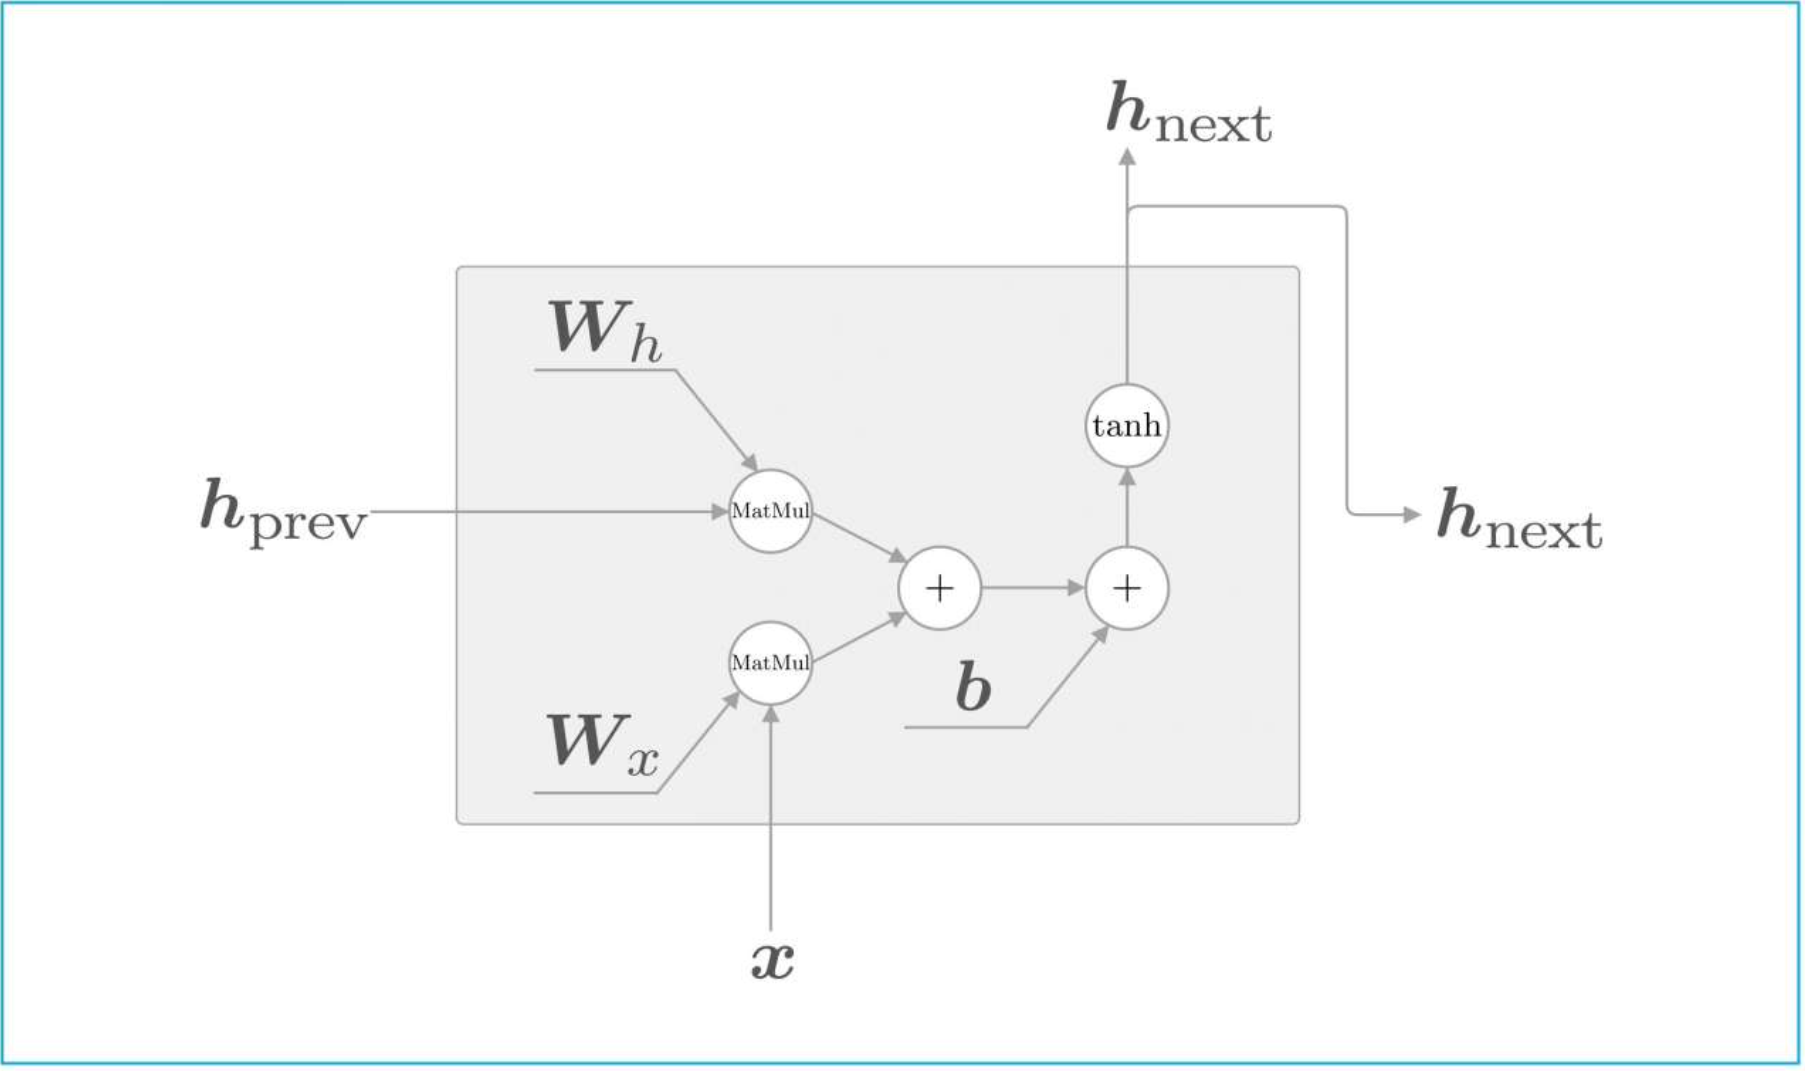

* 反向传播时

反向传播中的重点就是，类似于linear层中通过反向传播更新权参矩阵W，这里也更新了rnn层的权参矩阵，但是对应的是两个矩阵，一个是x输入变量的权参矩阵$W_x$，另外一个是隐藏层$h_t$对应的权参矩阵$W_t$

将循环展开后的RNN可以使用（常规的）误差反向传播法。换句话说，可以通过先进行正向传播，再进行反向传播的方式求目标梯度。

因为这里的误差反向传播法是“按时间顺序展开的神经网络的误差反向传播法”，所以称为Backpropagation Through Time（基于时间的反向传播），简称BPTT。

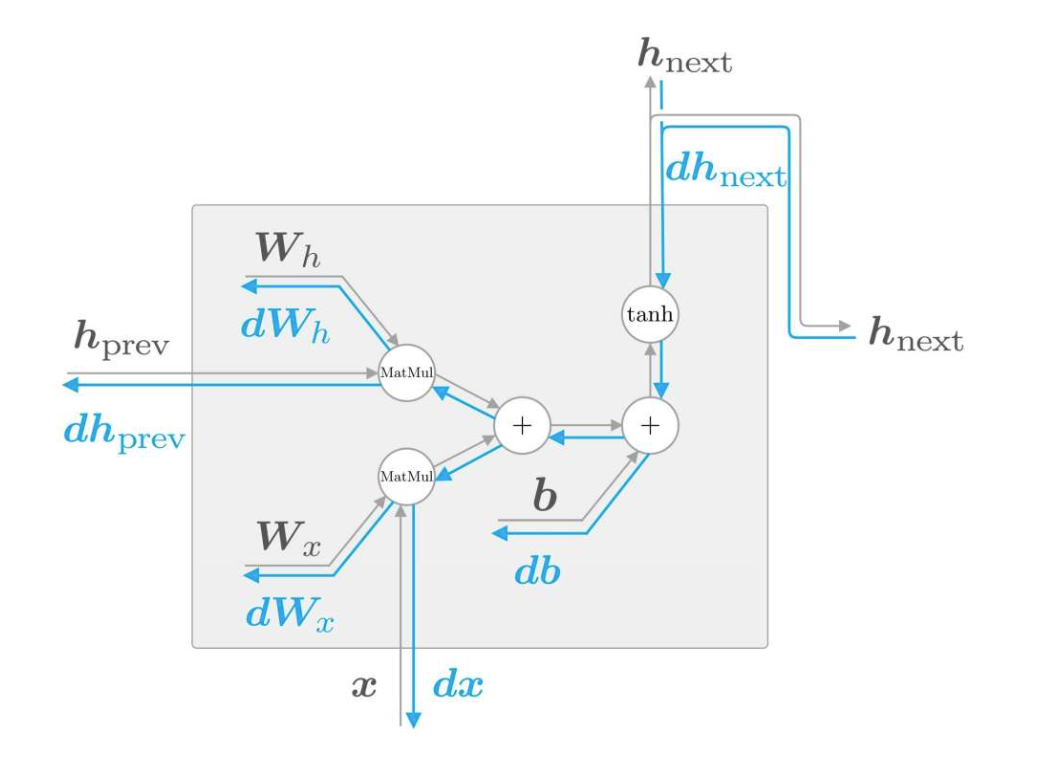

以下通过numpy来实现一个rnn层

In [ ]:
import numpy as np
class RNN:
    def __init(self,Wx,Wh,b):
        self.params=[Wx,Wh,b]
        self.grads=[np.zeros_like(Wx),np.zeros_like(Wh),np.zeros_like(b)]
        self.cache=None
    def forward(self,x,h_prev):
        Wx,Wh,b=self.params
        h_next=np.tanh(h_prev@Wh+x@Wx+b)
        self.cache(x,h_prev,h_next)
        return h_next



通过一个时间序列数据，来实现验证rnn
## 前置知识：时间序列数据处理
首先，时间序列回归是一种自回归，即前$tw$个序列的数值预测下1个的数值，所以在预处理时，首先要将train=前w周期数值与对应的预测数值进行分割， 

对于给定的时间序列，这个方法通过滑动窗口的方式创建一系列的训练样本。每个样本包括：

输入序列（train_seq）：这是当前窗口内的一段连续数据，长度为 tw。它代表了模型的输入特征。
目标值（train_label）：紧跟在输入序列后的单个数据点。这是模型需要预测的目标。
通过对整个时间序列进行迭代，从第一个数据点开始，每次向前移动一个步长，直到到达序列末尾减去窗口长度的位置，这个方法构建了一个输入序列及其对应的目标值的列表。

* 例子

假设我们有一个简单的时间序列数据 [1, 2, 3, 4, 5, 6, 7, 8, 9]，并且设置时间窗口 tw = 3。这个方法会创建以下序列和标签对：

输入序列: [1, 2, 3], 目标值: [4]
输入序列: [2, 3, 4], 目标值: [5]
输入序列: [3, 4, 5], 目标值: [6]
...
* 意义

这种数据准备方法对于时间序列预测任务来说非常关键。它允许模型学习如何基于过去的一系列数据点（train_seq）来预测未来的一个数据点（train_label）。对于RNN这样的序列模型来说，这种格式的数据是理想的，因为RNN能够处理序列数据，捕获时间序列中的模式和依赖性，从而预测序列的下一步或未来的值。这种方法不仅适用于RNN，也适用于LSTM、GRU等其他能处理序列数据的模型。

---

RNN层 
> [pytorch 文档](https://pytorch.org/docs/stable/generated/torch.nn.RNN.html)

```python
output,hidden_cell=RNN(self , input_size, hidden_size, num_layers=1, nonlinearity='tanh', bias=True, batch_first=False, dropout=0.0, bidirectional=False, device=None, dtype=None)
```
rnn的初始化函数以及对应参数，与rnn层的定义公式相对应 $$h_t=tanh(W_h \times h_{t-1}+W_x \times x +b_x+b_h)$$

> 其中parameters:

  * input_size:输入的x值的 feature 维度 The number of expected features in the input x
  * hidden_size: 隐藏层的feature维度，这里就类似于linear中out_feature The number of features in the hidden state h
  * num_layers: Number of recurrent layers 堆积rnn层数目. E.g., setting num_layers=2 would mean stacking two RNNs together to form a stacked RNN, with the second RNN taking in outputs of the first RNN and computing the final results. Default: 1
  * nonlinearity – The non-linearity to use. Can be either 'tanh' or 'relu'. Default: 'tanh'
  * bias – If False, then the layer does not use bias weights b_ih and b_hh. Default: True
  * <font color='red'>batch_first</font> – If True, then the input and output tensors are provided as (batch, seq, feature) instead of (seq, batch, feature). Note that this does not apply to hidden or cell states. See the Inputs/Outputs sections below for details. Default: False 

  <font color='red'>换句话，rnn输入以及输出的tensor形状默认是(seq,batch,feature)</font>

  * dropout – If non-zero, introduces a Dropout layer on the outputs of each RNN layer except the last layer, with dropout probability equal to dropout. Default: 0
  * bidirectional – If True, becomes a bidirectional RNN. Default: False

>inputs 输入
* input(x): tensor of shape $(L,H_{in}$ for unbatched input. $(L,N,H_{in})$ when batch_first=False, or $(N,L,H_{in})$ when batch_first=True containing the features of the input sequence. 
* h_0: tensor of shape $(D * numlayers,H_{out})$ for unbatched input or $(D* numlayers,N,H_{out})$ containing the initial hidden state for the input sequence batch. Defaults to to zeros if no provided:

其中

$$N=batch size;L=sequence length;D=2  \quad if \quad bidirectional =True  \quad otherwise \quad 1;H_{in}= input_{size};H_{out}=hidden_{size}$$

>outputs 输出

* ouput: tensor of shape $(L,D*H_{out})$ for unbatched input,$(L,N,D*H_{out})$ when batch_first=False or $(N,L,D*H_{out})$ when batch_first=True containing the output features(h_t) from the last layer of the RNN for each t.
* h_n: tensor of shape  $(D * numlayers,H_{out})$ for unbatched input or $(D* numlayers,N,H_{out})$ containing the final hidden state for each element in the batch.

<font color='red'>实际可以发现，input 的形状与output 形状相同，

$h_0 \quad h_n$ 形状相同</font>

以下构建一个简单的rnn实例

In [1]:
import torch 
import torch.nn as nn 
rnn=nn.RNN(input_size=10,hidden_size=20,num_layers=2)# 意味构建一个RNN实例，其输入的features 是10，内部隐藏层features 大小是20，同时是两个rnn重叠
"""
这行代码创建了一个RNN实例，其中输入特征的维度是10，
隐藏层的特征维度是20，且RNN由两层堆叠而成。这意味着数据在通过RNN时，
会首先通过第一层RNN，其输出再作为第二层RNN的输入。
"""
input=torch.randn(5,3,10)#构建一个3维度张量作为输入，（序列长度，每个批次中实例数，输入的features）

"""
这里创建了一个形状为 (5, 3, 10) 的张量，表示有5个时间步，每个批次有3个实例，
每个实例的输入特征维度为10。这符合RNN输入的期望形状：(序列长度, 批次大小, 输入特征维度)。
当然这中表示方法与一般的张量表示有不同，为了统一可以batch_first=True, then the input and output tensors are provided as (batch, seq, feature)
"""
print(input.shape)
h0=torch.randn(2,3,20)# 构建隐藏层的张量（rnn层数，批次大小，中间隐藏层属性数），这个应该保存上一次计算的结果，并投入下一次计算，一般而言其在开始时应该是一个0张量
"""
这行代码初始化了隐藏状态，形状为 (2, 3, 20)，其中2代表RNN层数，3是批次大小，20是隐藏层特征维度。
这是为了与你实例化的RNN中的num_layers和hidden_size对应。
通常，这个隐藏状态在开始时初始化为零张量，但也可以用随机数据初始化来探索不同的初始化效果。
在实践中，如果没有特别指定，PyTorch会默认使用全零张量作为初始隐藏状态。
"""
output,hn=rnn(input,h0)
print(output.shape)
print(h0.shape)           


torch.Size([5, 3, 10])
torch.Size([5, 3, 20])
torch.Size([2, 3, 20])


### 实验0 简单时间序列中的rnn
#### 问题：
  1. rnn中数组变换较为复杂，要考虑到时间步长的问题。
  2. 每一个周期后，需要将隐藏层清空，否则会出现错误：
    >遇到的 RuntimeError 错误提示你尝试了第二次通过计算图进行反向传播，但计算图在第一次调用 .backward() 后已经被释放了。
    >这个问题在循环中尤其常见，当你在同一个epoch内对多个数据点进行训练时，每次迭代都会调用 .backward()，从而尝试通过同一个计算图多次进行反向传播。
   ##### 解决方法
解决这个问题的一个关键是确保每次前向传播之前重置隐藏状态，同时还要确保在每次迭代中都不会尝试重用计算图。但在你的代码中，主要问题是在使用RNN的隐藏状态时没有正确地管理它。

<font color='red'>特别是，当使用RNN或LSTM时，需要在每次迭代中重新初始化隐藏状态，否则就会尝试在已经完成一次完整的前向和反向传播的计算图上进行操作，导致错误。</font>

 

在每次迭代中重置隐藏状态：这可以通过在每次迭代开始时创建新的隐藏状态实现，而不是在模型初始化时创建一个静态的隐藏状态。这样可以避免尝试在计算图中重用隐藏状态。

修改模型的forward方法：移除静态隐藏状态的使用，每次调用forward时都传入新的隐藏状态。

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
# 生成数据


# 数据预处理
def create_inout_sequences(input_data, tw):
    inout_seq = []
    L = len(input_data)
    for i in range(L-tw):
        train_seq = input_data[i:i+tw]
        train_label = input_data[i+tw:i+tw+1]
        inout_seq.append((train_seq ,train_label))
    return inout_seq


class RNN(nn.Module):
    def __init__(self,input_size=1,hidden_layer_size=10,output_size=1):
        super().__init__()
        self.hidden_layer_size = hidden_layer_size# hidden_layear_size 代表保存上一次与本次计算结果的隐藏层大小，是一个[1,hidden_layer_size]大小的向量
        self.rnn=nn.RNN(input_size,hidden_layer_size)
        self.linear=nn.Linear(hidden_layer_size,output_size)
        self.hidden_cell=(torch.zeros(1,1,self.hidden_layer_size))#实现每个批次开始时，清空之前批次的hidden value
    def forward(self,input_seq):
        run_out,self.hidden_cell=self.rnn(input_seq.view(len(input_seq),1,-1), self.hidden_cell)
        # 其中input_seq.view(len(input_seq) 的原因在于，rnn的input对应的结构为（时间步长，批次中实例数，feature number），这里通过input_seq获得时间步长（seq_length = 10），以及每个批次对应1个数据实例
        prediciton=self.linear(run_out.view(len(input_seq),-1))
        """这里run_out.view(len(input_seq,-1)的原因是为了和后面的linear层输入形状匹配，因为linear的输入形状为[N（batch），feature]，len(input_seq) 
        保持了序列长度作为新形状的第一个维度，这在这种情况下实际上充当了批次大小（因为我们假设批次大小为1）。
        """
        return prediciton[-1]#注意预测值最后一个序列才是预测结果

if __name__=="__main__":
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    t = np.linspace(0, 10, 1000)
    data = np.sin(t)
    print(f"连续数据的长度，注意时序数据实际包括了x，y",len(data))
    seq_length = 10#时间步长
    train_data = create_inout_sequences(data, seq_length)
    print(np.array(train_data).shape)
    model=RNN()
    model.to(device)
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    epochs=100

    for epoch in range(epochs):
     
        for x, y in train_data:
            optimizer.zero_grad()
            model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size))
            model.hidden_cell=model.hidden_cell.to(device)
            y_pred=model(torch.FloatTensor(x).to(device))
            loss=loss_fn(y_pred.to(device),torch.FloatTensor(y).to(device))
            loss.backward()
            optimizer.step()
    
  
        print(f'epoch: {epoch:3} loss: {loss.item():10.8f}')

print(f'epoch: {epoch:3} loss: {loss.item():10.10f}')


### 实验0.1 销售数据中使用rnn
[参考kaggle中的rnn，lstm](https://www.kaggle.com/code/namanmanchanda/rnn-in-pytorch)
使用较为简单的销售数据实现rnn
1. 实现eda观察数据，复习之前方法
2. 实现对数据的处理
> kears中内置了timesers_dataset_from_array()函数，可以较为方便的处理序列数据，但是pytorch中没有对用的函数之间使用，但是可以通过dataset，dataloader构建实现
3. 构建rnn，实现预测
3.1 数据处理开始时，先不考虑标准化，而后标准化进行对比

以下代码中有几个重要的点：
1. 关于其中输入输出张量的形状
 * 首先在构建rnn中，注意到输入张量的形状
 ```python
 self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)  # 使用batch_first=True以便输入的形状为(batch_size, seq_len, input_size)
 ```
 * 构建空张量，作为hidden初始张量，但是注意其形状
 ```python
 hidden = torch.zeros(1, batch_size, self.hidden_size).to(self.device)  # 初始化隐藏状态，对应的形状（D* numlyers,N,H_out)
 ```
 $(D \times numlayers,N,H_{out})$
* 其中$D \times numlayers$ 代表是否为双向rnn，如果是d=2，同时numlayer代表重叠的rnn数目。
* $N$代表每批次实例数目。
* $H_{out}$代表隐藏层的属性数目。
 2. forward中，注意要初始化hidden
 ```python
        hidden = torch.zeros(1, batch_size, self.hidden_size).to(self.device)  # 初始化隐藏状态
        out, hidden = self.rnn(x, hidden)
 ```
 在此，由于每一个batch都调用一次forward方法，故此要在开始时候，要将该batch对应的hidden重置，以防治之前的batch中hidden的影响，这也意味这必须考虑一个batch中包含多个步长数据，这些步长数据的hidden截至时间点在哪里
 3. forward中返回时间步长最后一个预测值
```python
    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        hidden = torch.zeros(1, batch_size, self.hidden_size).to(self.device)  # 初始化隐藏状态
        out, hidden = self.rnn(x, hidden)
        out = self.linear(out[:, -1, :])  # 只取序列的最后一个时间步的输出进行线性变换
        return out
```
在循环神经网络（RNN）中，输入是一个序列，模型在每个时间步上都会产生一个输出。对于某些任务，你可能对序列中每个时间步的输出都感兴趣，<font color='red'>但在许多情况下，特别是在进行序列到单个输出的预测任务中（如时间序列预测），你只关心序列的最终输出。这是因为最终输出可以被视为整个输入序列的“总结”，并用于进行预测。</font>

这一行执行了以下操作：

out 是RNN层的输出，其形状通常为 (batch_size, seq_len, hidden_size)。这里 batch_size 是每个批次的样本数量，seq_len 是序列的长度，hidden_size 是RNN隐藏层的大小。
> out[:, -1, :] 使用了Python的切片语法来选择每个序列的最后一个时间步的输出。
* : 表示选择所有批次的数据。
* -1 表示选择每个序列的最后一个元素，即最后一个时间步。
* : 表示选择隐藏状态的全部特征。
因此，这行代码的作用是将RNN的输出从包含整个序列的输出减少到只包含每个序列最后一个时间步的输出。

这使得输出的形状从 (batch_size, seq_len, hidden_size) 变为 (batch_size, hidden_size)。

这样做是为了将每个序列的最终状态（或“总结”）传递给下一层（通常是一个全连接层），用于最终的预测任务。

这在进行如时间序列预测、句子情感分析等任务时非常有用，因为在这些情况下，你通常只对序列的综合表示（即最后一个时间步的输出）感兴趣。
 
2. 时间序列数据，数据标准化的重要性
> 如果没有实现数据标准化，loss会非常高，基本无法使用；但使用标准化处理后，loss大大降低，但是在进行数据划分时候，是否要先划分了train以及test后再进行数据标准化，还是先进行数据标准化再划分数据集？
答案是：<font color='red'>进行数据标准化，先再划分数据集</font>
 

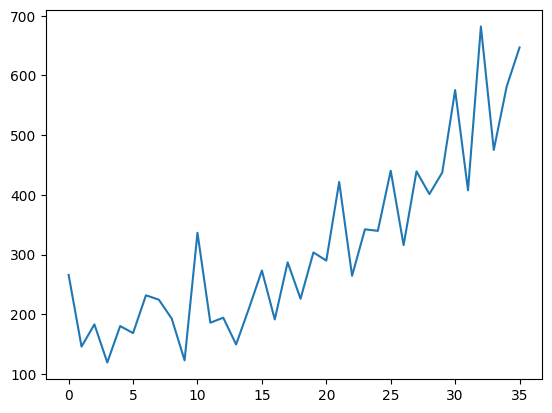

数据总长度：36; 训练集长度：28；测试集长度：8
Epoch 0, Loss: 0.9010047912597656
Epoch 0, Loss: 0.7741540670394897
Epoch 0, Loss: 0.47705864906311035
Epoch 0, Loss: 0.21851728856563568
Epoch 0, Loss: 0.3361456096172333
Epoch 1, Loss: 0.6508482694625854
Epoch 1, Loss: 0.6132664084434509
Epoch 1, Loss: 0.3491623103618622
Epoch 1, Loss: 0.21124963462352753
Epoch 1, Loss: 0.3900311291217804
Epoch 2, Loss: 0.48248615860939026
Epoch 2, Loss: 0.5030773878097534
Epoch 2, Loss: 0.26082679629325867
Epoch 2, Loss: 0.21892081201076508
Epoch 2, Loss: 0.44002029299736023
Epoch 3, Loss: 0.3514153063297272
Epoch 3, Loss: 0.4200060963630676
Epoch 3, Loss: 0.19905643165111542
Epoch 3, Loss: 0.2374560832977295
Epoch 3, Loss: 0.48196664452552795
Epoch 4, Loss: 0.25336888432502747
Epoch 4, Loss: 0.36147165298461914
Epoch 4, Loss: 0.16092737019062042
Epoch 4, Loss: 0.2607649266719818
Epoch 4, Loss: 0.5060927867889404
Epoch 5, Loss: 0.18735364079475403
Epoch 5, Loss: 0.32609614729881287
Epoch 5, Loss: 0.14206115901470184
Epoch 

In [28]:
import pandas as pd
import matplotlib.pyplot as plt  # 正确导入plt
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np

# 处理时间数据，通过构建dataset和dataloader
# 定义 Dataset 类
class TimeSeriesDataset(Dataset):
    def __init__(self, sequence, window_size):
        self.sequence = sequence
        self.window_size = window_size
        self.data = self.input_data(sequence, window_size)

    def input_data(self, seq, ws):
        out = []
        L = len(seq)
        for i in range(L-ws):
            window = seq[i:i+ws]
            label = seq[i+ws:i+ws+1]
            out.append((window, label))
        return out

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]

class MyRnn(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, device='cuda'):
        super().__init__()
        self.device = device
        self.hidden_size = hidden_size
        self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)  # 使用batch_first=True以便输入的形状为(batch_size, seq_len, input_size)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        hidden = torch.zeros(1, batch_size, self.hidden_size).to(self.device)  # 初始化隐藏状态
        out, hidden = self.rnn(x, hidden)
        out = self.linear(out[:, -1, :])  # 只取序列的最后一个时间步的输出进行线性变换
        return out

if __name__ == "__main__":
    df = pd.read_csv('data/MonthSales.csv')  # 注意路径分隔符
    df.iloc[:, 1].plot()  # 绘制第二列数据
    plt.show()  # 显示图形
    # 数据标准化
    data = df.iloc[:, 1].values
    mean=data.mean()
    std=data.std()
    data=(data-mean)/std
    train_data = data[:int(len(data) * 0.8)]
    test_data = data[len(train_data):]
    print(f"数据总长度：{len(data)}; 训练集长度：{len(train_data)}；测试集长度：{len(test_data)}")
    
 
    train_time_data = TimeSeriesDataset(train_data, 3)
    test_time_data = TimeSeriesDataset(test_data, 3)
    batch_size = 5
    train_loader = DataLoader(train_time_data, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_time_data, batch_size=batch_size, shuffle=False)
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MyRnn(input_size=1, hidden_size=20, output_size=1, device=device)
    model.to(device)
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=0.002)

    epochs = 100
    for epoch in range(epochs):
        model.train()
        for data, target in train_loader:
            data, target = data.to(device).float(), target.to(device).float()
            data = data.unsqueeze(-1)  # 增加一个维度以匹配RNN的期望输入形状(batch_size, seq_len, input_size)
            optimizer.zero_grad()
            outputs = model(data)
            loss = loss_fn(outputs, target.view(-1, 1))  # 确保target的形状与输出匹配
            loss.backward()
            optimizer.step()
            print(f"Epoch {epoch}, Loss: {loss.item()}")

# 对应word2vec 实现rnn对上下文的分析
> 参考《深度学习进阶》

rnn 的基本结构

第1层是Embedding层，该层将单词ID转化为单词的分布式表示（单词向量）。

然后，这个单词向量被输入到RNN层。RNN层向下一层（上方）输出隐藏状态，同时也向下一时刻的RNN层（右侧）输出隐藏状态。

RNN层向上方输出的隐藏状态经过Affine层(linear 层），传给Softmax层。

与word2vec不同在于，其不但输入了上下文（或者只是上文），同时还考虑前文的输入问题，

输入的数据是单词ID列表。首先，我们关注第1个时刻。作为第1个单词，单词ID为0的you被输入。此时，查看Softmax层输出的概率分布，可知say的概率最高，这表明正确预测出了you后面出现的单词为say。当然，这样的正确预测只在有“好的”（学习顺利的）权重时才会发生。

这里需要注意的是， RNN层“记忆”了“you say”这一上下文。更准确地说，RNN将“you say”这一过去的信息保存为了简短的隐藏状态向量。

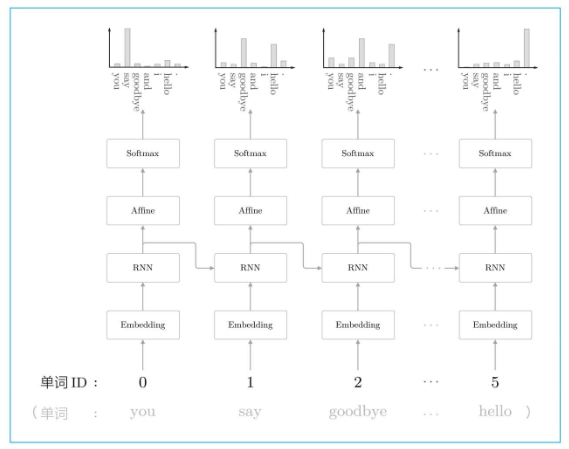

RNN层的工作是将这个信息传送到上方的Affine层和下一时刻的RNN层。

RNN可以“记忆”目前为止输入的单词，并以此为基础预测接下来会出现的单词。RNN层通过从过去到现在继承并传递数据，使得编码和存储过去的信息成为可能。

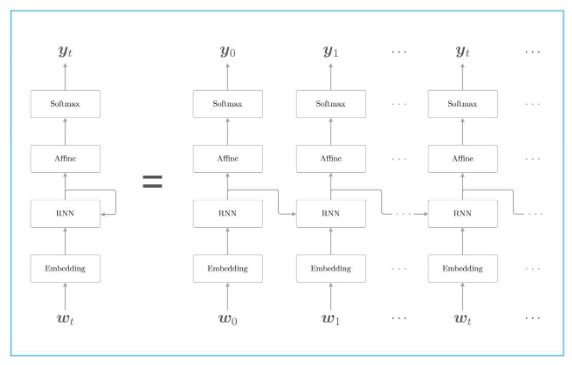

In [18]:
import torch 
import torch.nn as nn 
import numpy as np 
import torch.optim as optim
class MyRnn(nn.Module):
    def __init__(self, vocab_size, embedding_dim, hidden_dim):
        super(MyRnn, self).__init__()
        self.embedding = nn.Embedding(vocab_size,embedding_dim)
        self.rnn=nn.RNN(embedding_dim,hidden_dim,batch_first=True)
        self.linear=nn.Linear(hidden_dim,vocab_size)
    
    def forward(self,x):
        x=self.embedding(x)
        x,hidden=self.rnn(x)
        #x=x.squeeze(1)
        x=x[:, -1, :]
        x=self.linear(x)
        return x
if __name__ == "__main__":
    # 文本数据的处理，实习context，target的分离，
    # 文本预处理
    text = "you say goodbye and i say hello."
    words = text.split(' ')
    vocab = set(words)  # 构建词汇表
    vocab_size = len(vocab)

    word_to_ix = {word: ix for ix, word in enumerate(vocab)}  # 单词到索引的映射
    ix_to_word = {ix: word for ix, word in enumerate(vocab)}  # 索引到单词的映射
    print(f"word_to_ix:{word_to_ix}")

    # 创建输入序列和目标序列
    contexts = []
    targets = []
    for i in range(len(words)-1):
        contexts.append([word_to_ix[words[i]]])
        targets.append(word_to_ix[words[i+1]])
    # 转换为Tensor
    contexts = torch.tensor(contexts, dtype=torch.long)
    targets = torch.tensor(targets, dtype=torch.long)
    print(f'the context of sentences:', contexts)#注意这里只有上文，没有下文
    print(f'the target of sentences:', targets)


    ## 模型构建
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MyRnn(vocab_size=vocab_size, embedding_dim=15, hidden_dim=20)
    #model.to(device)
    loss_function = nn.CrossEntropyLoss()
    optimizer = optim.SGD(model.parameters(), lr=0.01)

    ## 模型训练
    epochs=100
    for  epoch in range(epochs):
        total_loss = 0
        for context, target in zip(contexts, targets):
            model.zero_grad()
            log_max=model(contexts)
            loss=loss_function(log_max,targets)
            loss.backward()
            optimizer.step()
 
        print(f'Epoch: {epoch}, Loss: {total_loss}')


word_to_ix:{'hello.': 0, 'i': 1, 'and': 2, 'say': 3, 'goodbye': 4, 'you': 5}
the context of sentences: tensor([[5],
        [3],
        [4],
        [2],
        [1],
        [3]])
the target of sentences: tensor([3, 4, 2, 1, 3, 0])
Epoch: 0, Loss: 0
Epoch: 1, Loss: 0
Epoch: 2, Loss: 0
Epoch: 3, Loss: 0
Epoch: 4, Loss: 0
Epoch: 5, Loss: 0
Epoch: 6, Loss: 0
Epoch: 7, Loss: 0
Epoch: 8, Loss: 0
Epoch: 9, Loss: 0
Epoch: 10, Loss: 0
Epoch: 11, Loss: 0
Epoch: 12, Loss: 0
Epoch: 13, Loss: 0
Epoch: 14, Loss: 0
Epoch: 15, Loss: 0
Epoch: 16, Loss: 0
Epoch: 17, Loss: 0
Epoch: 18, Loss: 0
Epoch: 19, Loss: 0
Epoch: 20, Loss: 0
Epoch: 21, Loss: 0
Epoch: 22, Loss: 0
Epoch: 23, Loss: 0
Epoch: 24, Loss: 0
Epoch: 25, Loss: 0
Epoch: 26, Loss: 0
Epoch: 27, Loss: 0
Epoch: 28, Loss: 0
Epoch: 29, Loss: 0
Epoch: 30, Loss: 0
Epoch: 31, Loss: 0
Epoch: 32, Loss: 0
Epoch: 33, Loss: 0
Epoch: 34, Loss: 0
Epoch: 35, Loss: 0
Epoch: 36, Loss: 0
Epoch: 37, Loss: 0
Epoch: 38, Loss: 0
Epoch: 39, Loss: 0
Epoch: 40, Loss:

In [20]:
def predict_next_word(model, context, word_to_ix, ix_to_word):
    """
    预测给定上下文后的下一个单词。
    
    参数:
    - model: 训练好的PyTorch模型。
    - context: 一个单词序列（字符串列表），作为上下文。
    - word_to_ix: 单词到索引的映射字典。
    - ix_to_word: 索引到单词的映射字典。
    
    返回:
    - 预测的下一个单词（字符串）。
    """
    # 将上下文单词转换为对应的索引
    context_idxs = torch.tensor([word_to_ix[w] for w in context], dtype=torch.long).unsqueeze(0)  # 增加一个批次维度
    # 传递上下文到模型以获得预测
    with torch.no_grad():
        logits = model(context_idxs)
        # 获得最高概率的单词索引
        _, predicted_idx = torch.max(logits, 1)
        # 将索引转换回单词
        predicted_word = ix_to_word[predicted_idx.item()]
    return predicted_word

context = ["you", "say", "goodbye", "and", "i"]
predicted_word = predict_next_word(model, context, word_to_ix, ix_to_word)
print(f"Given the context: {' '.join(context)}")
print(f"The predicted next word is: {predicted_word}")

Given the context: you say goodbye and i
The predicted next word is: say


## LSTM 
LSTM和GRU中增加了一种名为“门”的结构。基于这个门，可以学习到时序数据的长期依赖关系。本章我们将指出上一章的RNN的问题，介绍代替它的LSTM和GRU等“Gated RNN”。特别是我们将花很多时间研究LSTM的结构，并揭示它实现“长期记忆”的机制。此外，我们将使用LSTM创建语言模型，并展示它可以在实际数据上很好地学习。

>我们在实践中很少会用到SimpleRNN层。它通常过于简单，没有实际用途。特别是SimpleRNN层有一个主要问题：在t时刻，虽然理论上来说它应该能够记住许多时间步之前见过的信息，但事实证明，它在实践中无法学到这种长期依赖。

原因在于梯度消失问题，这一效应类似于在层数较多的非循环网络（前馈网络）中观察到的效应：随着层数的增加，神经网络最终变得无法训练。

LSTM层是SimpleRNN层的变体，它增加了一种携带信息跨越多个时间步的方式。假设有一条传送带，其运行方向平行于你所处理的序列。<font color='red'>序列中的信息可以在任意位置跳上传送带，然后被传送到更晚的时间步，并在需要时原封不动地跳回来。这其实就是LSTM的原理：保存信息以便后续使用，从而防止较早的信号在处理过程中逐渐消失。</font>

---

LSTM和GRU中增加了一种名为“门”的结构。基于这个门，可以学习到时序数据的长期依赖关系。本章我们将指出上一章的RNN的问题，介绍代替它的LSTM和GRU等“Gated RNN”。特别是我们将花很多时间研究LSTM的结构，并揭示它实现“长期记忆”的机制。此外，我们将使用LSTM创建语言模型，并展示它可以在实际数据上很好地学习。

1. 回顾 simple rnn
* forward的方法与前馈网络差别不大，只不过通过h隐藏层记录上一阶段的信息，并传递给下一个周期。

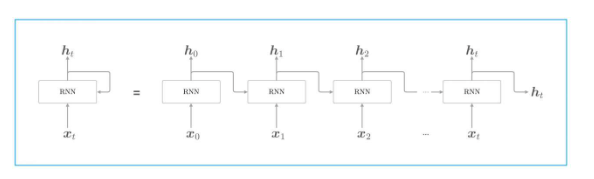

RNN的特点在于使用了上一时刻的隐藏状态，由此，RNN可以继承过去的信息。顺便说一下，如果用计算图来表示此时RNN层进行的处理：

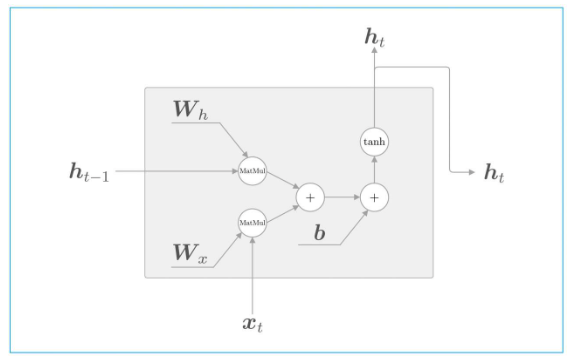

RNN层的正向传播进行的计算由矩阵乘积、矩阵加法和基于激活函数tanh的变换构成，这就是我们上一章看到的RNN层。

***问题***

simple rnn主要是存在梯度消失和梯度爆炸的问题

与前馈神经网络不同，rnn中由于h隐藏层的存在，其backward时，梯度会反向与时间步长方向传递，从而更新h隐藏层对应的权重矩阵$W_h$,这就可能造成梯度消失，梯度爆炸问题

由于隐藏层$h_{out}$（以及rnn向其他层）的输出函数为
$$out=tanh(h_{t-1}W_h+x_{int}W_x+b)..(1) $$ 
那么就梯度求导就应该对该函数求导，并且结果又传递给上一个时间t-1进行计算进行梯度求导，由于tanh的倒数函数问题，将导致越后面（或者说步长越前面）的梯度越小，产生梯度消失现象，从而使得前面步长$W_h,W_x$权重矩阵无法更新

>$W_h$以及$W_x$是通过不断的先前一个时间步的梯度更新，来训练得到具有所有时间步信息的矩阵。
*在简单的循环神经网络（RNN）中，权重矩阵$W_h$以及$W_x$负责在不同时间步之间传递信息。这些权重矩阵通过反向传播算法不断更新，目的是最小化网络在整个序列上的损失函数。

由于RNN在所有时间步使用相同的权重$W_h$以及$W_x$，这意味着在训练过程中，通过反向传播得到的梯度不仅仅是基于单个时间步的信息，而是整个序列的信息。
 
 每次权重更新都考虑了所有时间步上的梯度，目的是捕捉并利用序列数据中的时间依赖性。因此，经过多次迭代后，$W_h$以及$W_x$

 能够反映并整合整个时间序列的信息，帮助模型理解和学习序列中的模式和依赖关系。

 ---

 通过对应的公式（1），可以得知，梯度下降时，关注时间方向上的梯度，可知反向传播的梯度流经tanh、“+”和MatMul（矩阵乘积）运算。

 1. tanh求导后公式为$ \frac{\mathrm{d}y}{\mathrm{d}x}=1-y^2 $，从而导致如何多个求导函数根据时间步叠加后，其梯度会逐渐消失。

 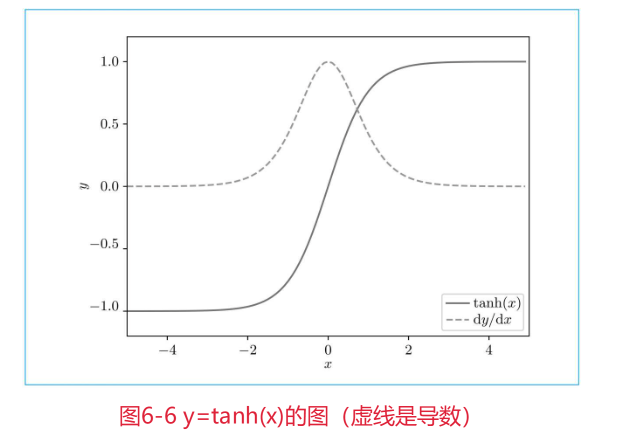

 虚线是y=tanh（x）的导数。从图中可以看出，它的值小于1.0，并且随着x远离0，它的值在变小。这意味着，当反向传播的梯度经过tanh节点时，它的值会越来越小。因此，如果经过tanh函数T次，则梯度也会减小T次。

 > 解决方法：是将激活函数由tanh换为relu，这是因为，在ReLU的情况下，当x大于0时，反向传播将上游的梯度原样传递到下游，梯度不会“退化”。

 2. 在不考虑tanh的情况下，需要实现对权重矩阵$W_h$的梯度$dhW_h$的梯度叠乘问题，（注意到这里$W_x$的梯度由于不向后传递，故不会出现叠乘问题，$W_x$的梯度不会在时间步之间叠乘，因为它只涉及当前时间步的输入和隐藏状态。
 
 相反$W_h$的梯度受到序列中每个时间步的累积影响，因为它参与了从一个时间步到下一个时间步的信息传递。）。

 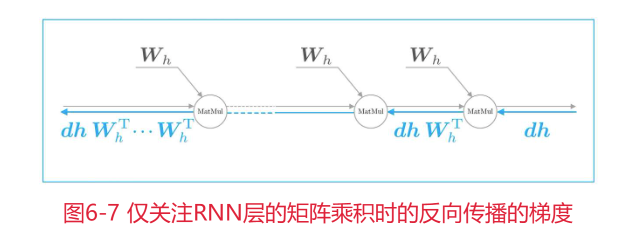

 假定从上游传来梯度dh，此时MatMul节点的反向传播通过矩阵乘积$dh{W_h}^T$计算梯度。之后，根据时序数据的时间步长，将这个计算重复相应次数。这里需要注意的是，每一次矩阵乘积计算都使用相同的权重$W_h$。

 简单而言，如果$W_h>1$那么将会出现梯度爆炸，如果<1就会出现梯度消失，对应矩阵，矩阵的奇异值将成为指标。简单而言，矩阵的奇异值表示数据的离散程度。根据这个奇异值（更准确地说是多个奇异值中的最大值）是否大于1，可以预测梯度大小的变化。
> 解决方法：梯度裁剪（gradients clipping）。 

$$  \text { if } \quad \begin{aligned}
\|\hat{\boldsymbol{g}}\| & \geqslant \text { threshold }: \\
\hat{\boldsymbol{g}} & =\frac{\text { threshold }}{\|\hat{\boldsymbol{g}}\|} \hat{\boldsymbol{g}}
\end{aligned}$$

通过将所有的权参梯度进行裁剪，可以防止梯度爆炸。这里假设可以将神经网络用到的所有参数的梯度整合成一个，并用符号$\hat{\boldsymbol{g}}$表示。另外，将阈值设置为threshold。此时，如果梯度的L2范数$\hat{\boldsymbol{g}}$大于或等于阈值，就按上述方法修正梯度，这就是梯度裁剪。 

### 对比RNN与LSTM 
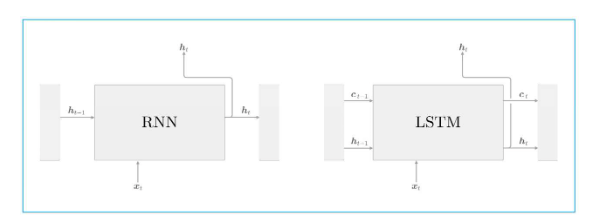

LSTM与RNN的接口的不同之处在于，LSTM还有路径c。这个c称为记忆单元（或者简称为“单元”），相当于LSTM专用的记忆部门。

记忆单元的特点是，仅在LSTM层内部接收和传递数据。也就是说，记忆单元在LSTM层内部结束工作，不向其他层输出。而LSTM的隐藏状态h和RNN层相同，会被（向上）输出到其他层。
>从接收LSTM的输出的一侧来看，LSTM的输出仅有隐藏状态向量h。记忆单元c对外部不可见，我们甚至不用考虑它的存在。
我理解这句话的意思是，之前h隐藏层对应输出实际就是计算输出，并到达下一层（例如linear）但是c只在不同步长实际的lstm层内部计算（实际就是同一个lstm层的不同对应步长），不进入下一层

> gete 门
Gate是“门”的意思，就像将门打开或合上一样，控制数据的流动

LSTM中使用的门并非只能“开或合”，还可以根据将门打开多少来控制水的流量。可以将“开合程度”控制在0.7（70%）或者0.2（20%）。

门的开合程度由0.0～1.0的实数表示（1.0为全开），通过这个数值控制流出的水量。这里的重点是，门的开合程度也是（自动）从数据中学习到的。

---
LSTM 中涉及了3种门：
 
* 输出门

首先，下一个步长的输入$h_t$，现在不单单是由上一个输入$h_{t-1}$以及本次输入$x_t$决定，而是加入了$c_t$这个长期记忆单元，但是这个$c_t$并不是gengerated by $h_{t-1}$以及是恒定不变的，而是由上一个LSTM层的输出$h_{t-1}$和上一个LSTM层的c值$c_{t-1}$计算得到的。
LSTM的输出$h_t$的计算公式如下：

$$h_t = o  \odot tanh( c_t) $$

 

其中$o$代表一个输出门的开合程度（流出比例）根据输入$x_t$和上一个状态$h_{t-1}$求出，和$c_{t-1}$没关系。对应的计算方法与之前隐藏层的计算方法类似，但是因为要输出一个（0，1）的概率，所以使用sigmoid函数：
$$ \boldsymbol{o}=\sigma\left(\boldsymbol{x}_{t} \boldsymbol{W}_{x}^{(\mathrm{o})}+\boldsymbol{h}_{t-1} \boldsymbol{W}_{h}^{(\mathrm{o})}+\boldsymbol{b}^{(\mathrm{o})}\right) $$


* 遗忘门以及实现$c_1$的遗忘

进一步讨论$c_t$,如何得到，$c_t$的决定因素是两个，一个是上一个时间步的$c_{t-1}$以及对上一个时间步值的遗忘比例即<font color='red'>遗忘门</font>$f$其是一个(0,1)的概率。
$${c_t}^{forget}=c_{t-1} \times f$$
而$f$也是通过与之前隐藏层计算类似方法得到
$$\boldsymbol{f}=\sigma\left(\boldsymbol{x}_{t} \boldsymbol{W}_{x}^{(\mathrm{f})}+\boldsymbol{h}_{t-1} \boldsymbol{W}_{h}^{(\mathrm{f})}+\boldsymbol{b}^{(\mathrm{f})}\right)$$

* 输入门以及对本时间步的比例记忆

lstm不但需要”遗忘“$c_{t-1}$的信息，同时还要加入本次$t$时间的信息，而这个信息实际上就是之前simple rnn对应的隐藏层值$g$（也是simple rnn向下一层输出值）。

$$\boldsymbol{g}=\tanh \left(\boldsymbol{x}_{t} \boldsymbol{W}_{x}^{(\mathrm{g})}+\boldsymbol{h}_{t-1} \boldsymbol{W}_{h}^{(\mathrm{g})}+\boldsymbol{b}^{(\mathrm{g})}\right)$$

但是与并不是所有本时间信息都应该输入，同样也应该有一个比例，即输入门，输入门判断新增信息g的各个元素的价值有多大。输入门不会不经考虑就添加新信息，而是会对要添加的信息进行取舍。换句话说，输入门会添加加权后的新信息。

其对应的遗忘门 $i$计算公式为
$$\boldsymbol{i}=\sigma\left(\boldsymbol{x}_{t} \boldsymbol{W}_{x}^{(\mathrm{i})}+\boldsymbol{h}_{t-1} \boldsymbol{W}_{h}^{(\mathrm{i})}+\boldsymbol{b}^{(\mathrm{i})}\right)$$

结合输入与遗忘门，得到 
$${c_t}^{in}=i\times g$$

最终的$$c_t={c_t}^{forget}+{c_t}^{in}$$
再回到一开始的推论，向下一个时间步传递的$h_t = o  \odot tanh( c_t) $，而$c_t$保存在长期记忆中，计算得到洗一个步长的$c_{t+1}$同时也影响了下一个$h_{t+1}$

lstm整体图结构如下

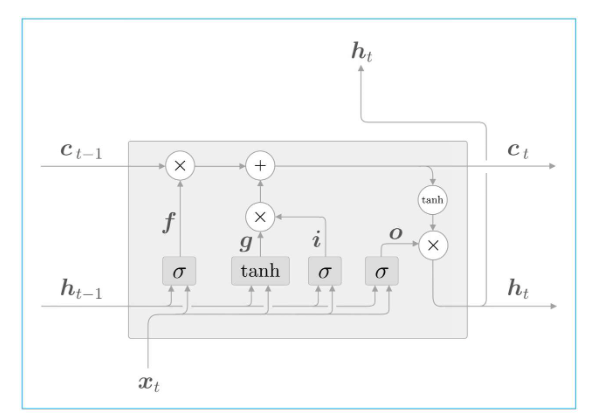


---

> rulu与tanh函数的选择：tanh的输出是-1.0～1.0的实数。我们可以认为这个-1.0～1.0的数值表示某种被编码的“信息”的强弱（程度）。而sigmoid函数的输出是0.0～1.0的实数，表示数据流出的比例。
>因此，在大多数情况下，门使用sigmoid函数作为激活函数，而包含实质信息的数据则使用tanh函数作为激活函数。 


#### lstm 解决梯度消失与梯度爆炸的原理

重点在于$c$长期记忆不参加矩阵运算，以及对应的运算是relu而不是tanh，故缓解了因为在反向梯度backward中出现的因为矩阵乘法以及tanh导函数导致的问题。

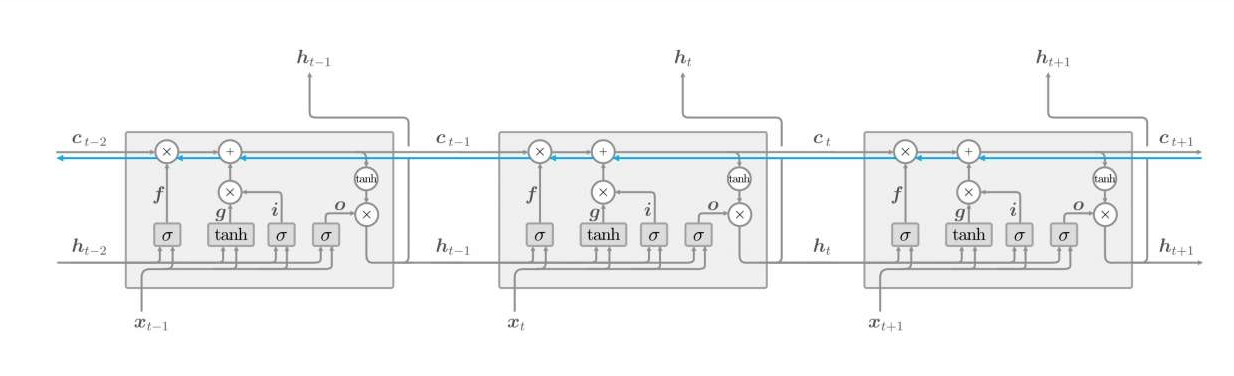

在图中，我们仅关注记忆单元，绘制了它的反向传播。此时，记忆单元的反向传播仅流过“+”和“×”节点。“+”节点将上游传来的梯度原样流出，所以梯度没有变化（退化）。

<font color='red'>而“×”节点的计算并不是矩阵乘积，而是对应元素的乘积（阿达玛积）</color>。顺便说一下，在之前的RNN的反向传播中，我们使用相同的权重矩阵重复了多次矩阵乘积计算，由此导致了梯度消失（或梯度爆炸）。而这里的LSTM的反向传播进行的不是矩阵乘积计算，而是对应元素的乘积计算，而且每次都会基于不同的门值进行对应元素的乘积计算。这就是它不会发生梯度消失（或梯度爆炸）的原因。

图的“×”节点的计算由遗忘门控制（每次输出不同的门值）。遗忘门认为“应该忘记”的记忆单元的元素，其梯度会变小；而遗忘门认为“不能忘记”的元素，其梯度在向过去的方向流动时不会退化。因此，可以期待记忆单元的梯度（应该长期记住的信息）能在不发生梯度消失的情况下传播。

### LSTM 在pytorch中的实现

> [pytorch文档](https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html#torch.nn.LSTM)
 1. 对应公式
$$
\begin{aligned}
&i_t=\sigma(W_{ii}x_t+b_{ii}+W_{hi}h_{t-1}+b_{hi}) \\
&f_t=\sigma(W_{if}x_t+b_{if}+W_{hf}h_{t-1}+b_{hf}) \\
&g_t=\tanh(W_{ig}x_t+b_{ig}+W_{hg}h_{t-1}+b_{hg}) \\
&o_t=\sigma(W_{io}x_t+b_{io}+W_{ho}h_{t-1}+b_{ho}) \\
&c_t=f_t\odot c_{t-1}+i_t\odot g_t \\
&h_{t}=o_{t}\odot\mathrm{tanh}(c_{t})
\end{aligned}
$$

In [36]:
# 构建lstm层 
# 其与simple rnn的差别只在于现在有个长期记忆c的出现，其形状与h隐藏层可以不同
import torch
import torch.nn as nn
input_size=10
hidden_size=20
layer=2
lstm=nn.LSTM(input_size=input_size,hidden_size=hidden_size,num_layers=layer,batch_first=True)

##创建了LSTM网络并指定了batch_first=True参数，这意味着输入张量应该遵循(batch_size, sequence_length, input_feature)的形状。
batch_size=5#5每个批次包含的样本数
sequence_length=3#每个批次每个样本的时间步长是3或者说包含了三个元素，例如[1,2,3]
input_feature=10#每个样本10个属性
input=torch.randn(batch_size,sequence_length,input_feature)

h0=torch.zeros(layer,batch_size,hidden_size)
c0=torch.zeros(layer,batch_size,hidden_size)

output,(h1,c1)=lstm(input,(h0,c0))
print(output.shape)
 

torch.Size([5, 3, 20])


## LSTM 模型优化
结合之前的知识，并根据lstm的特点，可以通过以下方法实现lstm的优化：

### 1.循环dropout（recurrent dropout）：

>这是dropout的一种变体，用于在循环层中降低过拟合。简单要点在于，lstm 的dropout不在同一个lstm向其他不同类型层，例如linear层传递时实现，而是在叠加lstm层间应用

通过叠加LSTM层，可以期待能够学习到时序数据的复杂依赖关系。

换句话说，通过加深层，可以创建表现力更强的模型，但是这样的模型往往会发生过拟合（overfitting）。

更糟糕的是，RNN比常规的前馈神经网络更容易发生过拟合，因此RNN的过拟合对策非常重要。

通过叠加LSTM层，可以期待能够学习到时序数据的复杂依赖关系。换句话说，通过加深层，可以创建表现力更强的模型，但是这样的模型往往会发生过拟合（overfitting）。更糟糕的是，RNN比常规的前馈神经网络更容易发生过拟合，因此RNN的过拟合对策非常重要

循环dropout与一般的dropout有一定的差别，

在PyTorch中，nn.LSTM模块提供了内置的dropout功能，用于在LSTM层之间添加dropout，以防止模型过拟合。

注意，这里的dropout仅在多层LSTM层之间应用，而不是在时间步之间或最后一层LSTM和输出层之间应用。要在nn.LSTM中使用dropout，可以通过dropout参数指定dropout比例。

同时如果是一层没有stacking的lstm没有dropout没有意义，必须要多个lstm层，才有价值，当num_layers <= 1时，dropout参数将被忽略，因为仅当有多层时，层间dropout才有意义。
```python
lstm = nn.LSTM(input_size, hidden_size, num_layers, dropout=0.2)

```


### 2.循环层堆叠（stacking recurrent layers）：

>这会提高模型的表示能力（代价是更大的计算量）。实际就是加深网络，但是是多个lstm组合在一起

在PyTorch中，堆叠LSTM层意味着将多个LSTM层按顺序叠加在一起，以形成一个更深的网络结构。

这种做法可以帮助网络学习更复杂的特征表示，提高在复杂序列处理任务上的性能。

PyTorch的nn.LSTM模块自带支持层堆叠的功能，你只需要通过num_layers参数指定想要堆叠的LSTM层数即可。
```python
import torch.nn as nn

input_size = 10  # 输入特征的维度
hidden_size = 20  # 每层LSTM隐藏状态的维度
num_layers = 3  # LSTM层的数量

lstm = nn.LSTM(input_size, hidden_size, num_layers)

```
**注意事项**
输出维度：在堆叠的LSTM中，除了最后一层，每一层的输出都会作为下一层的输入。

每一层的隐藏状态维度由hidden_size参数决定，但是所有层的输入特征维度必须匹配，

因此，除了第一层可以接收原始输入外，其他每层的输入特征维度将等于前一层的hidden_size。

初始状态：如果你需要为每一层指定初始的隐藏状态和单元状态，记得它们的形状应该考虑层数，

即(num_layers * num_directions, batch, hidden_size)，这里num_directions会因为是否双向而有所不同（单向为1，双向为2）。




### 3.  双向循环层（bidirectional recurrent layer）：

>它会将相同的信息以不同的方式呈现给RNN，可以提高精度并缓解遗忘问题。我们将使用这3种方法来完善温度预测RNN。

双向RNN（bidirectional RNN）。双向RNN是一种常见的RNN变体，它在某些任务上的性能比普通RNN更好。

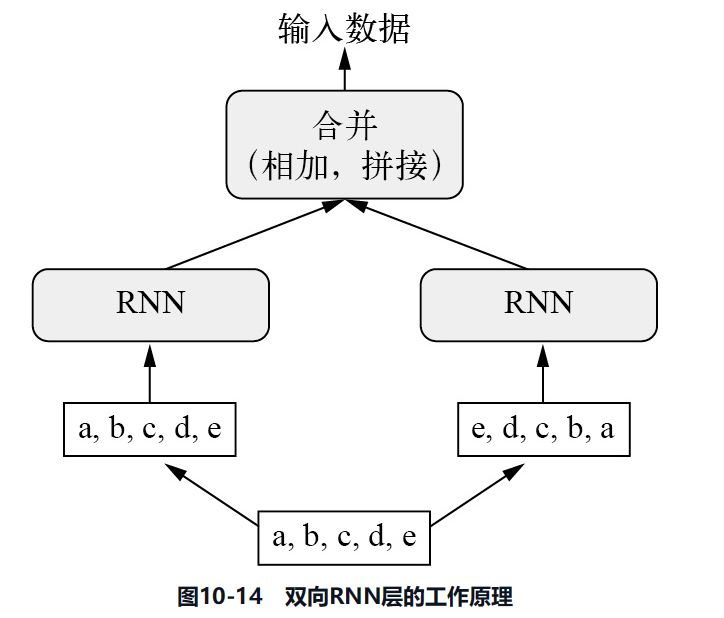

简单来说就是时间步长序列先正向输入lstm模型，然后再同时逆向输入另外一个lstm模型，然后结果合并。

双向长短期记忆网络（Bidirectional Long Short-Term Memory, Bi-LSTM）是一种特殊类型的循环神经网络（RNN），它在处理序列数据时能够考虑到信息的前后文关系。

Bi-LSTM由两个独立的LSTM组成，分别用于正向（从过去到未来）和反向（从未来到过去）地处理序列数据，最后将两个方向的信息融合在一起。这种结构使得Bi-LSTM在需要理解整个序列来进行预测的任务中特别有效，

比如在自然语言处理（NLP）任务中，包括但不限于文本分类、情感分析、命名实体识别等。


它常用于自然语言处理，可谓深度学习对自然语言处理的“瑞士军刀”。RNN特别依赖于顺序，它按顺序处理输入序列的时间步，而打乱时间步或反转时间步会完全改变RNN从序列中提取的表示。

正是由于这个原因，如果顺序对问题很重要（比如温度预测问题），那么RNN的表现就会很好。双向RNN利用了RNN的顺序敏感性：它包含两个普通RNN（比如前面介绍过的GRU层和LSTM层），

每个RNN分别沿一个方向对输入序列进行处理（按时间正序和按时间逆序），然后将它们的表示合并在一起。通过沿着两个方向处理序列，双向RNN能够捕捉到可能被单向RNN忽略的模式。

<font color='red'>对于价格数据，天气数据等，对顺序非常敏感，且越接近的数据影响越大，那么双向rnn就不太合适</font>

但是对语言类数据就有很强的意义，

---

* 工作原理
Bi-LSTM的关键在于它同时利用了两个方向上的信息：

  * 正向LSTM：从序列的开始到结束进行处理，捕获从过去到未来的依赖关系。
  * 反向LSTM：从序列的结束到开始进行处理，捕获从未来到过去的依赖关系。
  
在处理完整个序列之后，Bi-LSTM会将两个方向上的隐藏状态（和/或输出）以某种方式（例如，拼接或相加）结合起来，以获取更全面的序列表示。

* 优点

更丰富的序列表示：由于能够同时考虑到序列中每个元素的前文和后文信息，Bi-LSTM通常能够比单向LSTM获得更加丰富和全面的序列表示。
更好的性能：在很多任务中，Bi-LSTM由于其能够捕获双向依赖性而表现出更好的性能。
使用场景
Bi-LSTM被广泛应用于需要理解整个序列来进行预测的场景，尤其是在自然语言处理领域，如：

文本分类；情感分析；语言模型；命名实体识别；机器翻译

---- 

* 为什么语言中逆序，正向lstm具有价值

对于许多其他问题（包括自然语言），一个单词对理解句子的重要性，通常并不取决于它在句子中的位置。对于文本数据，逆序处理的效果与正序处理一样好——你可以倒着阅读文本（试试吧）。虽然单词顺序对理解语言很重要，但使用哪种顺序并不重要。

重要的是，在逆序序列上训练的RNN学到的表示不同于在原始序列上训练学到的表示，正如在现实世界中，如果时间倒流（你的人生是第一天死亡、最后一天出生），那么你的心智模型也会完全不同。

在机器学习中，如果一种数据表示不同但有用，那么总是值得加以利用，并且这种表示与其他表示的差异越大越好。

它提供了观察数据的全新角度，可以捕捉到数据中被其他方法忽略的内容，因此有助于提高模型在某个任务上的性能。

这正是集成（ensembling）方法背后的原理。双向RNN正是利用这一想法来提高正序RNN的性能。

它从两个方向查看输入序列（如图10-14所示），从而得到更加丰富的表示，并捕捉到仅使用正序RNN时可能忽略的一些模式。

---

pytorch中对双向lstm的实现

在PyTorch中，可以通过设置nn.LSTM模块的bidirectional参数为True来创建一个Bi-LSTM：

```python
import torch.nn as nn

input_size = 10  # 输入特征维度
hidden_size = 20  # LSTM隐藏状态的特征维度
num_layers = 1  # LSTM层的数量

bi_lstm = nn.LSTM(input_size, hidden_size, num_layers, bidirectional=True)
```

### 4. 权重共享

## 实验1.1 基于lstm的价格预测
lstm实现价格预测，并加入dropout，以及多层lstm以提升效果,但由于双向lstm不适合价格预测，故在此使用单向lstm

[参考kaggle中的rnn，lstm](https://www.kaggle.com/code/namanmanchanda/rnn-in-pytorch)

1. 在之前rnn代码基础上，实现dataset，dataloader的包装以实现代码的更加正规化
2. 实现$r^2$的评价
3. 实现预测对比
4. 通过pands对时间序列数据进行处理

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt  # 正确导入plt
import torch
from torch.utils.data import Dataset, DataLoader
import torch.nn as nn
import numpy as np
import common.tomutil as tom
from sklearn.metrics import r2_score


# 处理时间数据，通过构建dataset和dataloader
# 定义 Dataset 类
class TimeSeriesDataset(Dataset):
    def __init__(self, sequence, window_size):
        self.sequence = sequence
        self.window_size = window_size
        self.data = self.input_data(sequence, window_size)

    def input_data(self, seq, ws):
        out = []
        L = len(seq)
        for i in range(L-ws):
            window = seq[i:i+ws]
            label = seq[i+ws:i+ws+1]
            out.append((window, label))
        return out

    def __len__(self):
        return len(self.data)

    def __getitem__(self, index):
        return self.data[index]

class MyLstm(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=1, device='cuda',layers=2, dropout=0.2):
        super().__init__()
        self.device = device
        self.layers=layers
        self.hidden_size = hidden_size
        #self.rnn = nn.RNN(input_size, hidden_size, batch_first=True)  # 使用batch_first=True以便输入的形状为(batch_size, seq_len, input_size)
        self.lstm=nn.LSTM(input_size=input_size,hidden_size=hidden_size,num_layers=layers,batch_first=True,dropout=dropout)
        self.linear = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        batch_size, seq_len, _ = x.size()
        hidden = torch.zeros(self.layers, batch_size, self.hidden_size).to(self.device)  # 初始化隐藏状态
        long_cell = torch.zeros(self.layers, batch_size, self.hidden_size).to(self.device)  # 初始化长期记忆c状态
        hiddens = (hidden,long_cell)
        out, hiddens = self.lstm(x, hiddens)
        """
        当out 对应的输出(L,N,D*Hout)当batch_first=False ，或者（N，L,,D*Hout)当batch_first=True，L代表时间步长长度，N代表一个批次中样本数，D代表是否为双向lstm，如果是D=2
        """
        out = self.linear(out[:, -1, :])  # 只取序列的最后一个时间步的输出进行线性变换
        return out

if __name__ == "__main__":
    df = pd.read_csv('data/Alcohol_Sales.csv',index_col='DATE',parse_dates=True)  # 注意路径分隔符
    print(df.info())
    df.dropna(inplace=True)
    print(f"去除null后数据长度{len(df)}")
    df.rename(columns={'S4248SM144NCEN': 'sales'}, inplace=True)
    print(df.head())
    print(df.index)
    df.index.freq='MS'
    """
    在Pandas中，df.index.freq = 'MS'这句话用于设置DataFrame或Series的时间索引（index）的频率（freq）属性为"MS"。
    这里，df是一个DataFrame或Series对象，其索引已经是一个时间索引（DatetimeIndex）。"MS"代表月初（Month Start），意味着每个时间戳表示每个月的第一天。
    """
    #df.iloc[:, 1].plot()  # 绘制第二列数据
    df.plot(color='green',figsize=(10,7))
    plt.show()  # 显示图形
    # 数据标准化
    data = df.iloc[:, 0].values
    mean=data.mean()
    std=data.std()
    data=(data-mean)/std
    train_data = data[:int(len(data) * 0.8)]
    test_data = data[len(train_data):]
    print(f"数据总长度：{len(data)}; 训练集长度：{len(train_data)}；测试集长度：{len(test_data)}")
    
 
    train_time_data = TimeSeriesDataset(train_data, 3)
    test_time_data = TimeSeriesDataset(test_data, 3)
    batch_size = 5
    train_loader = DataLoader(train_time_data, batch_size=batch_size, shuffle=False)
    test_loader = DataLoader(test_time_data, batch_size=batch_size, shuffle=False)
    
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = MyLstm(input_size=1, hidden_size=20, output_size=1, device=device,layers=2, dropout=0.2)
    model.to(device)
    loss_fn = nn.MSELoss()
    optimizer = torch.optim.Adam(params=model.parameters(), lr=0.002)
    
    train_loss_list = []
    test_loss_list=[]
    train_acc_list = []
    test_acc_list=[]


    epochs = 1000
    for epoch in range(epochs):
        train_epoch_loss=[]
        train_epoch_acc=[]
        model.train()
        for data, target in train_loader:
            data, target = data.to(device).float(), target.to(device).float()
            data = data.unsqueeze(-1)  # 增加一个维度以匹配RNN的期望输入形状(batch_size, seq_len, input_size)
            optimizer.zero_grad()
            outputs = model(data)
            loss = loss_fn(outputs, target.view(-1, 1))  # 确保target的形状与输出匹配
      

            loss.backward()

            optimizer.step()
            #为计算r2，必须手续将张量转换为numpy数组
            target_np = target.view(-1, 1).detach().cpu().numpy()
            outputs_np = outputs.detach().cpu().numpy()
            acc = r2_score(target_np, outputs_np)
            ## 计算r2分数
            #print(f"Epoch {epoch}, Loss: {loss.item()}")

            train_epoch_loss.append(loss.item())
            train_epoch_acc.append(acc)
        # 可选：在此处添加代码进行模型评估
        model.eval()#eval模式下关闭dropout
        test_epoch_loss=[]
        test_epoch_acc=[]
        with torch.no_grad():
            for data, target in test_loader:
                data, target = data.to(device).float(), target.to(device).float()
                data = data.unsqueeze(-1)  # 增加一个维度以匹配RNN的期望输入形状(batch_size, seq_len, input_size)
                outputs=model(data)
                loss = loss_fn(outputs, target.view(-1, 1))  # 确保target的形状与输出匹配
                test_epoch_loss.append(loss.item())
                _,pred_label=torch.max(outputs,1)
                #acc=((pred_label==labels).sum().item())/len(labels)#与实际labels类别的对比如果正确就加1，并最后与该批次labels数目对比
                            #为计算r2，必须手续将张量转换为numpy数组
                target_np = target.view(-1, 1).detach().cpu().numpy()
                outputs_np = outputs.detach().cpu().numpy()
                acc = r2_score(target_np, outputs_np)
                ## 计算r2分数
              
                test_epoch_acc.append(acc)
 
        if epoch%100 == 0:
            print(f"Epoch {epoch}, Loss: {loss.item()}; and acc r2:{acc}")
        train_mean_batch_loss=np.mean(train_epoch_loss)
        train_mean_batch_acc=np.mean(train_epoch_acc)
        train_loss_list.append(train_mean_batch_loss)
        train_acc_list.append(train_mean_batch_acc)
        test_mean_batch_loss=np.mean(test_epoch_loss)
        test_mean_batch_acc=np.mean(test_epoch_acc)
        test_loss_list.append(test_mean_batch_loss)
        test_acc_list.append(test_mean_batch_acc)
        #print(f"Epoch {epoch+1}, the last one batch in this epoch test Loss: {loss.item()}")#这里loss.item 计算的是最后一个batch的损失值
        print(f"Epoch {epoch+1}, the mean test loss of this epoch is : {test_mean_batch_loss}")#这里loss.item 计算的是最后一个batch的损失值
        print(f"Epoch {epoch+1}, the mean test acc of this epoch is : {test_mean_batch_acc*100}%")#这里loss.item 计算的是最后一个batch的损失值
        print('****************************************************************')
    tom.loss_acc_fig(train_loss_list, test_loss_list,train_acc_list,test_acc_list)

# RNN LSTM 在NLP中的应用

## 实验1.2 基于lstm的上下文

[参考多伦多大学](https://www.cs.toronto.edu/~lczhang/aps360_20191/lec/w06/rnn.html)
[基于预训练模型的lstm](https://gitee.com/nlp_practice/nlp_practice_source_code/blob/master/Chapter08/8.4%20%E5%AE%9E%E8%B7%B5.ipynb)
[基于pytorch使用BI-LSTM模型做中文文本分类](https://blog.csdn.net/lei729533667/article/details/123068126)
实验数据采用[中文情感分析数据集](https://github.com/CLUEbenchmark/CLUE)
实验数据采用 就业与考研数据title分类，分为两个文件，但为了方便，首先将两个数据分别读取到dataframe中，并添加label列，标识类别，而后将两个文件合并成一个文件，

In [3]:
import pandas as pd
file_path_job  =r"C:\Users\tom\OneDrive\LUCK\luckLab\IRM_Class2\IRM_class\Deep Learning\data\job.txt"
file_path_academy = r"C:\Users\tom\OneDrive\LUCK\luckLab\IRM_Class2\IRM_class\Deep Learning\data\academy.txt"
# Function to read a file and return a dataframe with a specific label
def read_file(file_path, label):
    titles = []
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            titles.append(line.strip())
    # Create DataFrame
    data = pd.DataFrame(titles, columns=['job_title'])
    # Add the "label" column with the specified value
    data['label'] = label
    return data

# Read the first file and assign label 1
job_data = read_file(file_path_job, 1)

# Read the second file and assign label 0
academy_data = read_file(file_path_academy, 0)

# Merge the two dataframes
merged_data = pd.concat([job_data, academy_data], ignore_index=True)

# Display the first and last few entries of the merged dataframe
print(merged_data.head())
print(merged_data.tail())

#######载入预定义模型，定义词典，定义
import torch
import torch.nn as nn
file_path = r'C:\data\NLP\tencent-ailab-embedding-zh-d200-v0.2.0-s.txt' 
word_vectors={}
i=0
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        if i==0:
            print("跳过第一行")
        else:
            word, vector_str = line.split(' ', 1)#通过splict，将每一行的前两个空格之间的字符作为第一个元素对应word，空格之后的字符作为第二个元素对应word的张量，1代表只划分遇到的第一个空格
            vector = torch.FloatTensor([float(x) for x in vector_str.split()])# 对张量对应的vect_str进行划分得到目标矩阵中的每一个值，并转换为tensor float
            word_vectors[word] = vector# 填充之前定义的字典，其中key=word，value=张量
        i=i+1


# 构建词典和词向量矩阵
words = list(word_vectors.keys())# 将词典中的所有词提取出来，形成一个列表
word_dict={w:i for i,w in enumerate(words)}#构建字典，key=word，value=序号，从而使得后期可以根据词，得到对应序号，而这个序号也就是从对应word_vectors_matrix 中得到对应词张量的序号
word_to_id = {w: i for i, w in enumerate(words)}# 构建一个字典，其中key=word，value=对应的序号
id_to_word = {i: w for i, w in enumerate(words)}# 构建一个字典，其中key=序号，value=对应的word
word_vectors_matrix = torch.stack(list(word_vectors.values()))#首先提取出所有的word_vectors字典中value张量，然后通过torch.stack函数将这些张量堆叠起来，形成一个矩阵
print(f"得到的词向量矩阵形状为：{word_vectors_matrix.shape}")

                     job_title  label
0                    初中科学课助教招募      1
1                 百度校园品牌部实习生招聘      1
2  北京师范大学昌平附属学校 诚聘优秀毕业生和优秀在职教师      1
3         中国移动（成都）产业研究院2020年校招      1
4          急聘（英文教育学问卷数据分析）在读博士      1
                        job_title  label
949                       专业换了参考书      0
950                    考纲修订后首次模考！      0
951  24广工考研今天开始网上确认！特别提醒和常见问题看这里！      0
952      广工考研人备考情况大公开！11月别忘了做这些事！      0
953    25考研 | 最新！华南师范大学各学院校区分布一览！      0


In [4]:
import jieba

# Assuming merged_data is your merged dataframe from the previous step

# Function to segment text using jieba
def segment_text(text):
    # Use jieba to segment the text and return a list of words
    segmented = jieba.lcut(text)
    return ' '.join(segmented)  # Join the words with space for easier viewing

# Apply the segmentation function to each title and create a new column with the results
merged_data['title_word'] = merged_data['job_title'].apply(segment_text)

# Display the updated dataframe
print(merged_data.head())

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\tom\AppData\Local\Temp\jieba.cache
Loading model cost 0.383 seconds.
Prefix dict has been built successfully.


                     job_title  label                              title_word
0                    初中科学课助教招募      1                            初中 科学课 助教 招募
1                 百度校园品牌部实习生招聘      1                       百度 校园 品牌 部 实习生 招聘
2  北京师范大学昌平附属学校 诚聘优秀毕业生和优秀在职教师      1  北京师范大学 昌平 附属 学校   诚聘 优秀 毕业生 和 优秀 在职 教师
3         中国移动（成都）产业研究院2020年校招      1            中国移动 （ 成都 ） 产业 研究院 2020 年校 招
4          急聘（英文教育学问卷数据分析）在读博士      1             急聘 （ 英文 教育学 问卷 数据分析 ） 在读 博士


In [6]:
import torch
import torch.nn as nn
file_path = r'C:\data\NLP\tencent-ailab-embedding-zh-d200-v0.2.0-s.txt' 
word_vectors={}
i=0
with open(file_path, 'r', encoding='utf-8') as f:
    for line in f:
        if i==0:
            print("跳过第一行")
        else:
            word, vector_str = line.split(' ', 1)#通过splict，将每一行的前两个空格之间的字符作为第一个元素对应word，空格之后的字符作为第二个元素对应word的张量，1代表只划分遇到的第一个空格
            vector = torch.FloatTensor([float(x) for x in vector_str.split()])# 对张量对应的vect_str进行划分得到目标矩阵中的每一个值，并转换为tensor float
            word_vectors[word] = vector# 填充之前定义的字典，其中key=word，value=张量
        i=i+1


# 构建词典和词向量矩阵
words = list(word_vectors.keys())# 将词典中的所有词提取出来，形成一个列表
word_dict={w:i for i,w in enumerate(words)}#构建字典，key=word，value=序号，从而使得后期可以根据词，得到对应序号，而这个序号也就是从对应word_vectors_matrix 中得到对应词张量的序号
word_to_id = {w: i for i, w in enumerate(words)}# 构建一个字典，其中key=word，value=对应的序号
id_to_word = {i: w for i, w in enumerate(words)}# 构建一个字典，其中key=序号，value=对应的word
word_vectors_matrix = torch.stack(list(word_vectors.values()))#首先提取出所有的word_vectors字典中value张量，然后通过torch.stack函数将这些张量堆叠起来，形成一个矩阵
print(f"得到的词向量矩阵形状为：{word_vectors_matrix.shape}")

跳过第一行
得到的词向量矩阵形状为：torch.Size([2000000, 200])


In [7]:
def generate_title_vector(title, word_dict, word_vectors_matrix):
    words = title.split()
    vectors = []
    for word in words:
        idx = word_dict.get(word, None)
        if idx is not None:
            vectors.append(word_vectors_matrix[idx])
        else:
            # 如果词不在字典中，可以选择忽略或使用全局平均向量代替
            vectors.append(torch.mean(word_vectors_matrix, dim=0))
    if vectors:
        title_vector = torch.mean(torch.stack(vectors), dim=0)
    else:
        # 如果标题没有有效词，使用全局平均向量
        title_vector = torch.mean(word_vectors_matrix, dim=0)
    return title_vector

# 示例：为第一个标题生成向量表示

first_title = merged_data['title_word'].iloc[0]
first_title_vector = generate_title_vector(first_title, word_dict, word_vectors_matrix)
print(first_title_vector.shape)

torch.Size([200])
